<a href="https://colab.research.google.com/github/RIyadhaque492/Rangpur_Team_Recursion/blob/main/2_AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
datasets = [
                    "/content/drive/MyDrive/NASA/dsc_fc_summed_spectra_2022_v01.csv",
                    "/content/drive/MyDrive/NASA/dsc_fc_summed_spectra_2023_v01.csv"
                    ]

In [ ]:
count = 0

for data_file in datasets :

    if count == 0:
        data_all_init = pd.read_csv(data_file, \
                    delimiter = ',', parse_dates=[0], \
                    infer_datetime_format=True, na_values='0', \
                    header = None)

    else:
        data_all_init = pd.concat([data_all_init, pd.read_csv(data_file, \
                    delimiter = ',', parse_dates=[0], \
                    infer_datetime_format=True, na_values='0', \
                    header = None)])

    count += 1

data_all_init.reset_index(inplace=True, drop=True)

In [ ]:
IMF= {0: "Time",
                  1: "Bx", 2: "By", 3: "Bz"}

In [ ]:
key_list = list(range(4,54))
val_list = ["Spectrum_"+str(i+1) for i in list(range(51))]
iterable = zip(key_list, val_list)
spectrum= {key_list: val_list for key_list,val_list in iterable }

In [ ]:
new_DSCVR = {**IMF, **spectrum}
new_DSCVR

{0: 'Time',
 1: 'Bx',
 2: 'By',
 3: 'Bz',
 4: 'Spectrum_1',
 5: 'Spectrum_2',
 6: 'Spectrum_3',
 7: 'Spectrum_4',
 8: 'Spectrum_5',
 9: 'Spectrum_6',
 10: 'Spectrum_7',
 11: 'Spectrum_8',
 12: 'Spectrum_9',
 13: 'Spectrum_10',
 14: 'Spectrum_11',
 15: 'Spectrum_12',
 16: 'Spectrum_13',
 17: 'Spectrum_14',
 18: 'Spectrum_15',
 19: 'Spectrum_16',
 20: 'Spectrum_17',
 21: 'Spectrum_18',
 22: 'Spectrum_19',
 23: 'Spectrum_20',
 24: 'Spectrum_21',
 25: 'Spectrum_22',
 26: 'Spectrum_23',
 27: 'Spectrum_24',
 28: 'Spectrum_25',
 29: 'Spectrum_26',
 30: 'Spectrum_27',
 31: 'Spectrum_28',
 32: 'Spectrum_29',
 33: 'Spectrum_30',
 34: 'Spectrum_31',
 35: 'Spectrum_32',
 36: 'Spectrum_33',
 37: 'Spectrum_34',
 38: 'Spectrum_35',
 39: 'Spectrum_36',
 40: 'Spectrum_37',
 41: 'Spectrum_38',
 42: 'Spectrum_39',
 43: 'Spectrum_40',
 44: 'Spectrum_41',
 45: 'Spectrum_42',
 46: 'Spectrum_43',
 47: 'Spectrum_44',
 48: 'Spectrum_45',
 49: 'Spectrum_46',
 50: 'Spectrum_47',
 51: 'Spectrum_48',
 52: 'Spectru

In [ ]:
DSCVR_data_all =  data_all_init.rename(columns=new_DSCVR)
DSCVR_data_all

Time       Bx        By        Bz  Spectrum_1  \
0      2022-01-01 00:00:00 -6.17170  1.124830 -4.902280   38.031400   
1      2022-01-01 00:01:00 -6.28883  1.233130 -4.790010   38.386800   
2      2022-01-01 00:02:00 -6.11811  0.871923 -5.128300   37.563600   
3      2022-01-01 00:03:00 -6.28704  1.249870 -4.766400   38.109400   
4      2022-01-01 00:04:00 -6.42125  1.171560 -4.532300   37.589300   
...                    ...      ...       ...       ...         ...   
701275 2023-05-02 23:55:00  4.33665  2.801270  0.954633    1.004790   
701276 2023-05-02 23:56:00  4.66778  2.105820  1.260660    0.781621   
701277 2023-05-02 23:57:00  4.28322  3.021540  0.927773    0.854185   
701278 2023-05-02 23:58:00  4.31376  2.677270  1.723270    0.801559   
701279 2023-05-02 23:59:00  4.51542  2.303170  1.832570    2.265740   

        Spectrum_2  Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  \
0         0.231726    46.04270   44.974300    55.91430   43.706900  ...   
1         0.231726    45.52570   46.258700    55.14280   43.276800  ...   
2         0.231726    45.19550   46.822200    55.74840   42.789400  ...   
3         0.242084    46.70830   47.171300    53.53800   42.155800  ...   
4         0.231726    47.48880   45.323400    54.54040   44.277300  ...   
...            ...         ...         ...         ...         ...  ...   
701275    0.231726     4.64757    0.626576     3.54595    0.231726  ...   
701276    0.231726     5.97222    0.360648     3.39143    0.231726  ...   
701277    0.231726     8.10454    2.025800     4.22000    0.231726  ...   
701278    0.231726    12.76210    2.818550     4.82242    0.301864  ...   
701279    0.231726    11.68700    1.892900     2.39384    0.231726  ...   

        Spectrum_41  Spectrum_42  Spectrum_43  Spectrum_44  Spectrum_45  \
0               NaN          NaN          NaN          NaN          NaN   
1               NaN          NaN          NaN          NaN          NaN   
2               NaN          NaN          NaN          NaN          NaN   
3               NaN          NaN          NaN          NaN          NaN   
4               NaN          NaN          NaN          NaN          NaN   
...             ...          ...          ...          ...          ...   
701275          NaN          NaN          NaN          NaN          NaN   
701276          NaN          NaN          NaN          NaN          NaN   
701277          NaN          NaN          NaN          NaN          NaN   
701278          NaN          NaN          NaN          NaN          NaN   
701279          NaN          NaN          NaN          NaN          NaN   

        Spectrum_46  Spectrum_47  Spectrum_48  Spectrum_49  Spectrum_50  
0               NaN          NaN          NaN          NaN          NaN  
1               NaN          NaN          NaN          NaN          NaN  
2               NaN          NaN          NaN          NaN          NaN  
3               NaN          NaN          NaN          NaN          NaN  
4               NaN          NaN          NaN          NaN          NaN  
...             ...          ...          ...          ...          ...  
701275          NaN          NaN          NaN          NaN          NaN  
701276          NaN          NaN          NaN          NaN          NaN  
701277          NaN          NaN          NaN          NaN          NaN  
701278          NaN          NaN          NaN          NaN          NaN  
701279          NaN          NaN          NaN          NaN          NaN  

[701280 rows x 54 columns]

In [ ]:
datetime_col = DSCVR_data_all.iloc[:, 0]
imf_cols = DSCVR_data_all.iloc[:, 1:4]
spectra_cols = DSCVR_data_all.iloc[:, 4:]


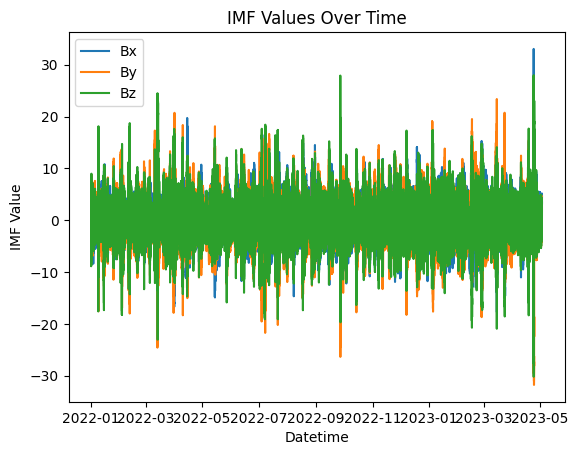

In [ ]:
import matplotlib.pyplot as plt

for col in imf_cols.columns:
    plt.plot(datetime_col, imf_cols[col], label=col)

plt.xlabel('Datetime')
plt.ylabel('IMF Value')
plt.legend()
plt.title('IMF Values Over Time')
plt.show()


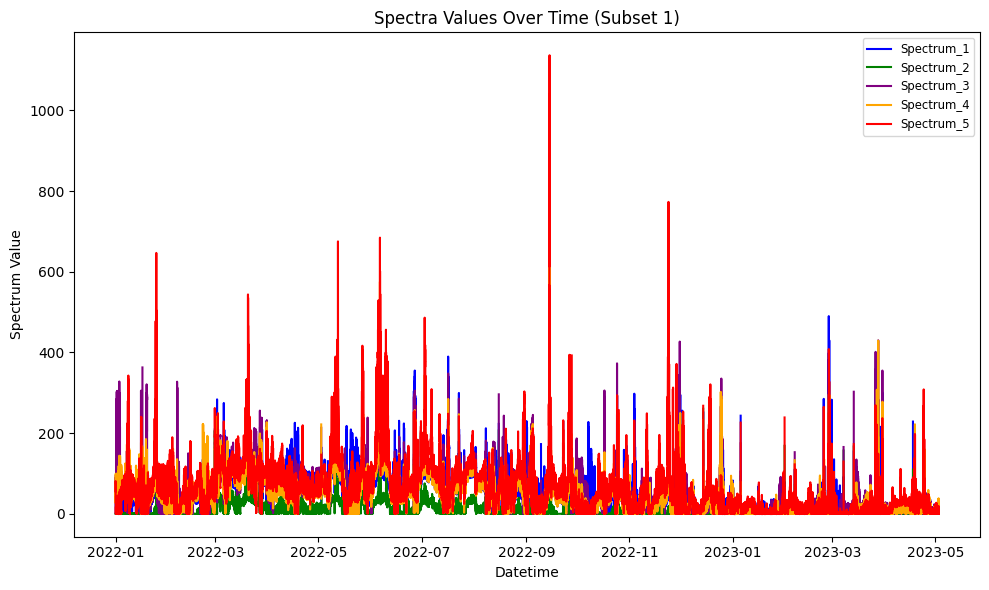

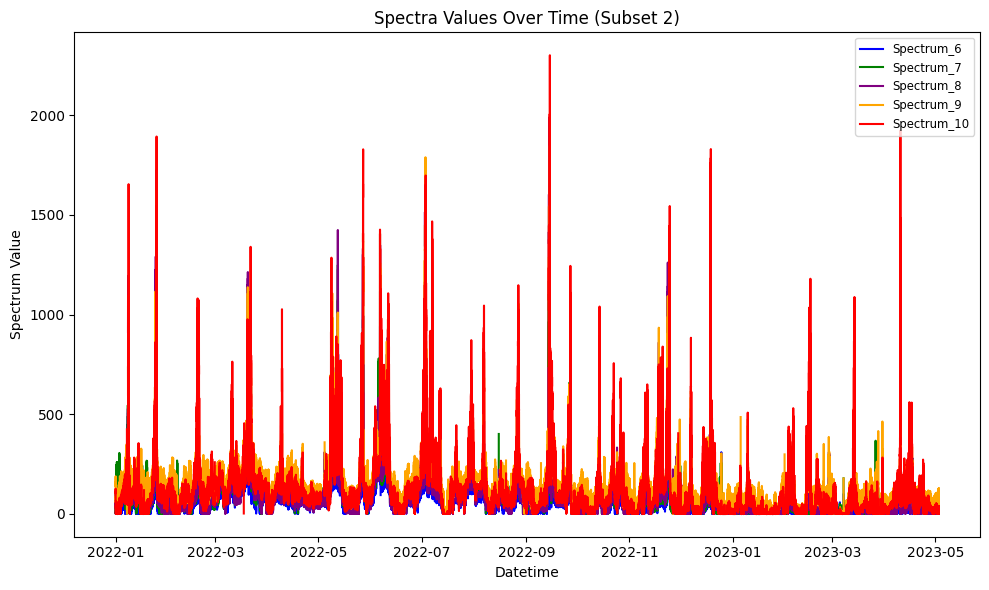

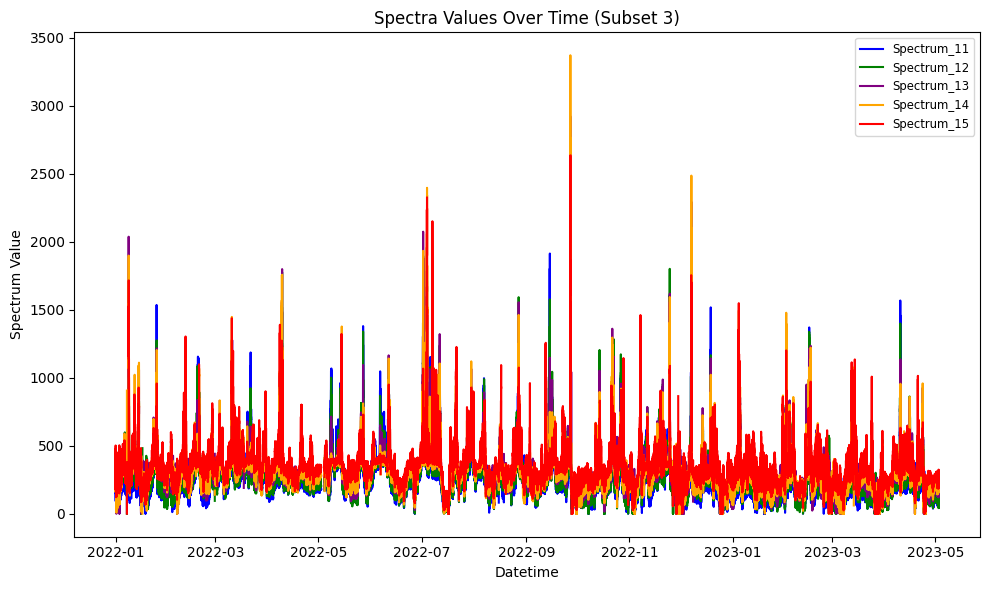

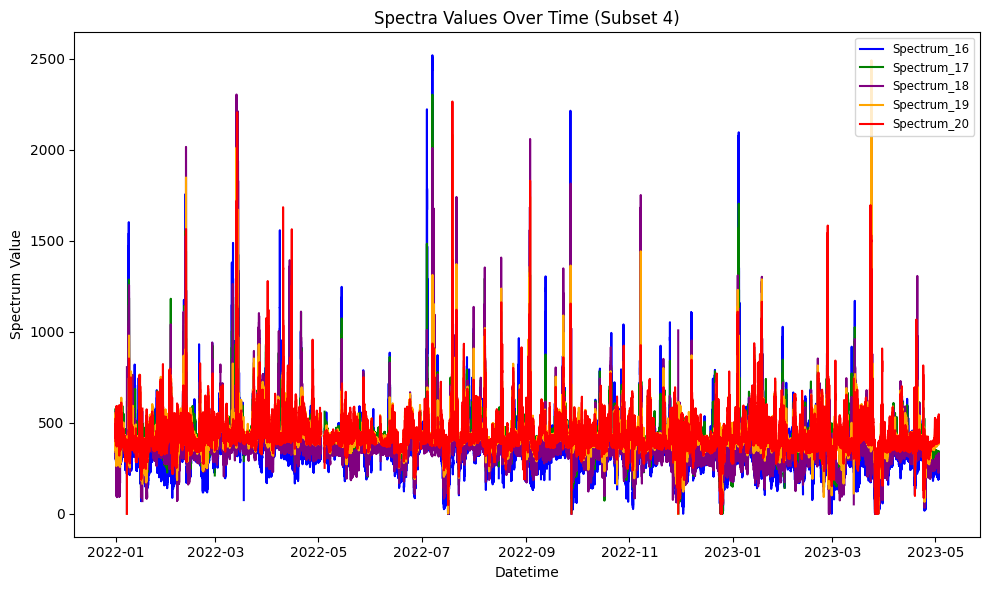

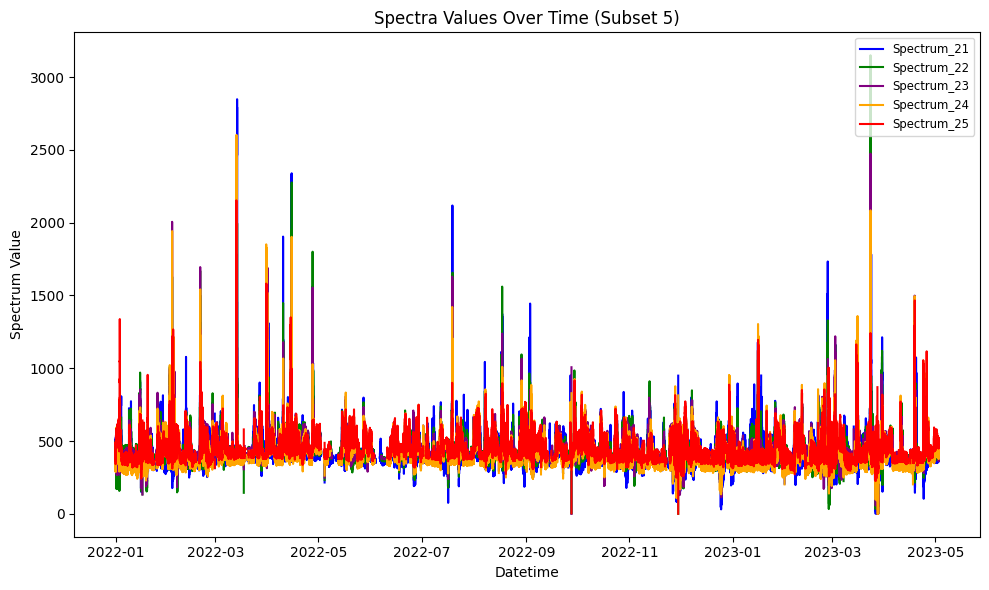

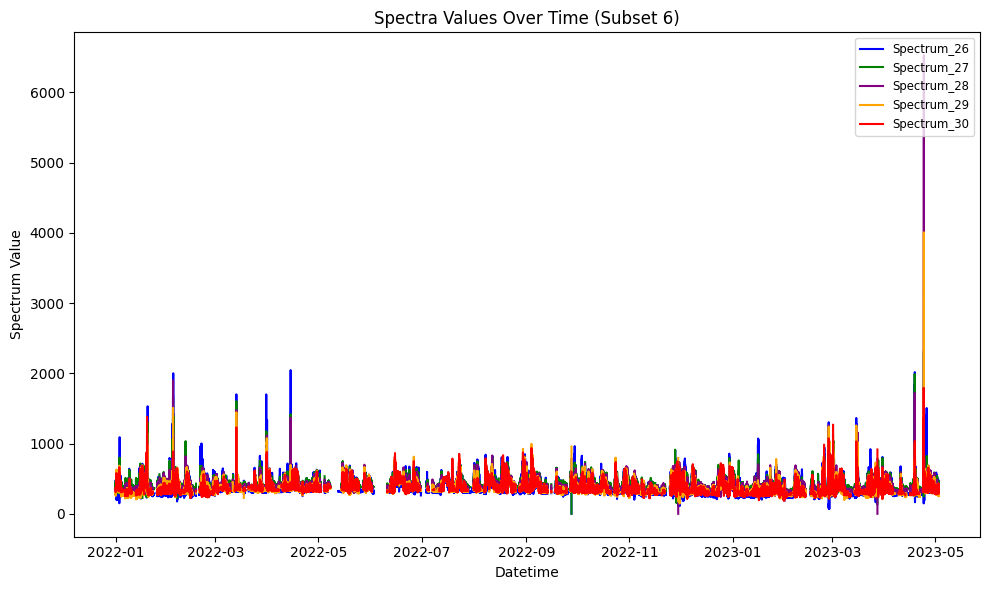

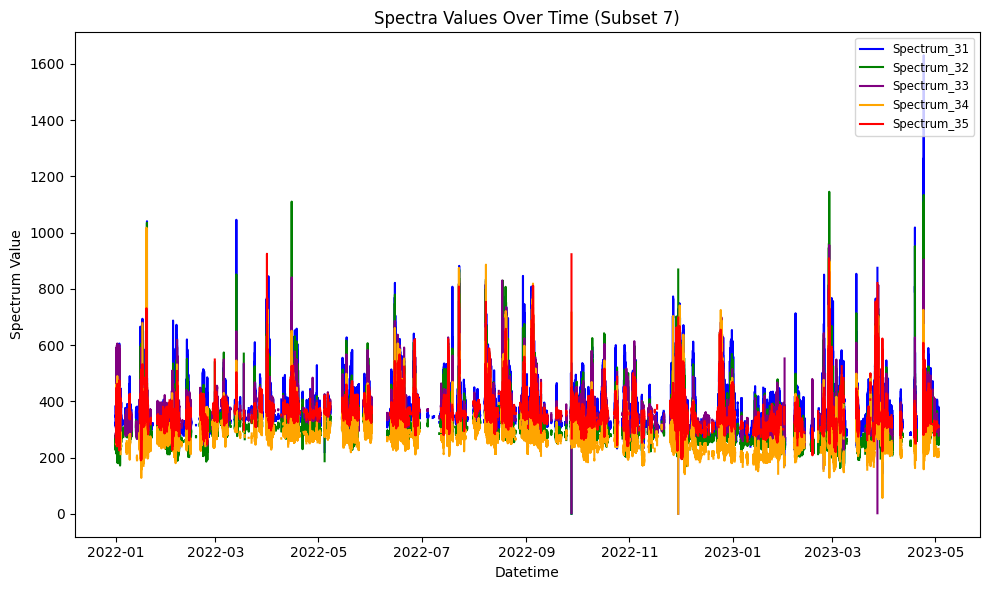

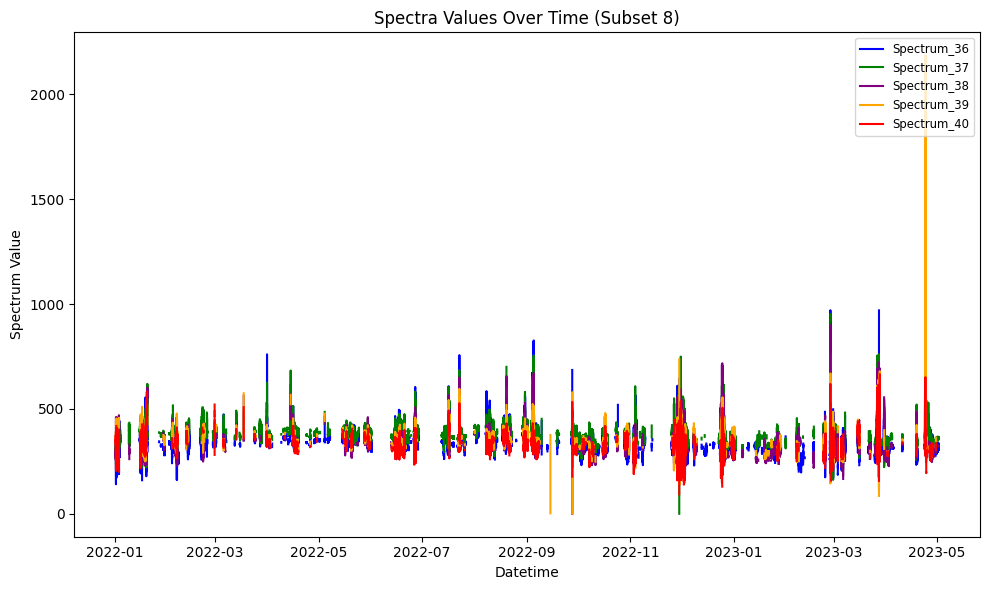

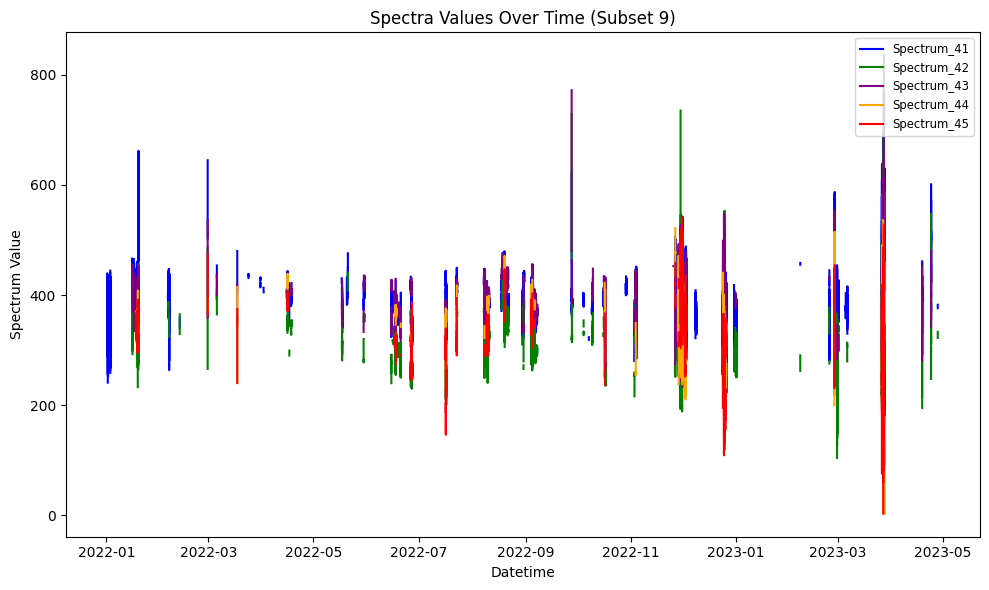

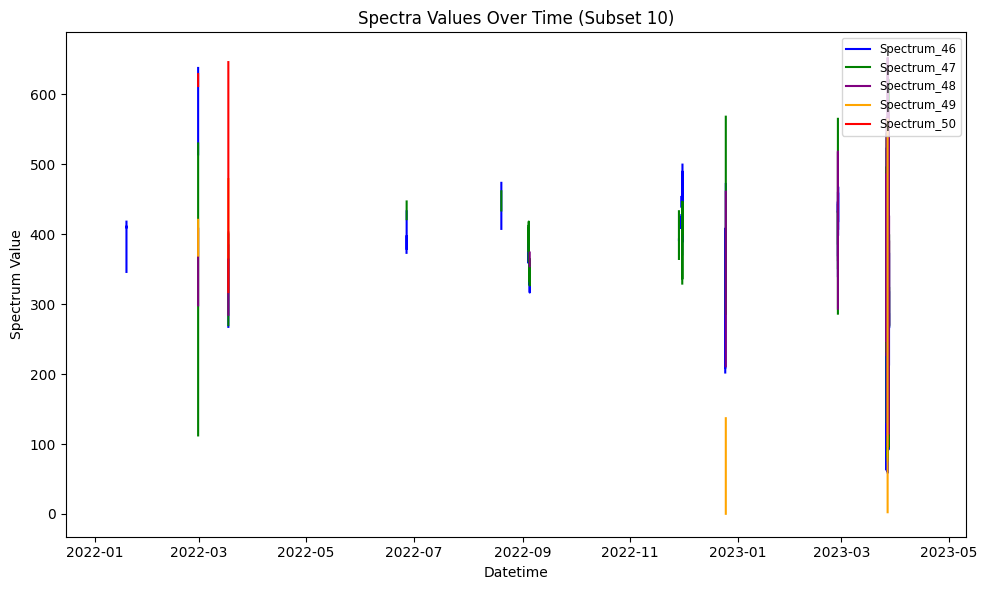

In [ ]:
import matplotlib.pyplot as plt

cols_per_subset = 5

num_subsets = len(spectra_cols.columns) // cols_per_subset
if len(spectra_cols.columns) % cols_per_subset != 0:
    num_subsets += 1

colors = [ 'blue', 'green', 'purple', 'orange','red']

for i in range(num_subsets):

    start_idx = i * cols_per_subset
    end_idx = start_idx + cols_per_subset

    subset_cols = spectra_cols.iloc[:, start_idx:end_idx]

    plt.figure(figsize=(10, 6))
    for j, col in enumerate(subset_cols.columns):
        plt.plot(datetime_col, subset_cols[col], label=col, color=colors[j % len(colors)])

    plt.xlabel('Datetime')
    plt.ylabel('Spectrum Value')
    plt.title(f'Spectra Values Over Time (Subset {i + 1})')
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()



In [ ]:
missing_values = DSCVR_data_all.isna()


In [ ]:
missing_count = DSCVR_data_all.isna().sum()
print(missing_count)


Time                0
Bx               2175
By               2175
Bz               2175
Spectrum_1      21327
Spectrum_2      21338
Spectrum_3      21334
Spectrum_4      21331
Spectrum_5      21326
Spectrum_6      21325
Spectrum_7      21324
Spectrum_8      21322
Spectrum_9      25085
Spectrum_10     25089
Spectrum_11     25089
Spectrum_12     25090
Spectrum_13     25090
Spectrum_14     25093
Spectrum_15     25585
Spectrum_16     26165
Spectrum_17     27025
Spectrum_18     29597
Spectrum_19     35666
Spectrum_20     50150
Spectrum_21     58248
Spectrum_22     79558
Spectrum_23     96764
Spectrum_24    115377
Spectrum_25    145589
Spectrum_26    172519
Spectrum_27    198309
Spectrum_28    239357
Spectrum_29    261192
Spectrum_30    318829
Spectrum_31    347827
Spectrum_32    370240
Spectrum_33    439747
Spectrum_34    472181
Spectrum_35    492550
Spectrum_36    556882
Spectrum_37    568167
Spectrum_38    638161
Spectrum_39    649981
Spectrum_40    662892
Spectrum_41    679188
Spectrum_4

In [ ]:
missing_percentage = DSCVR_data_all.isnull().sum() * 100 / len(DSCVR_data_all)


In [ ]:
missing_percentage

Time            0.000000
Bx              0.310147
By              0.310147
Bz              0.310147
Spectrum_1      3.041153
Spectrum_2      3.042722
Spectrum_3      3.042151
Spectrum_4      3.041724
Spectrum_5      3.041011
Spectrum_6      3.040868
Spectrum_7      3.040726
Spectrum_8      3.040440
Spectrum_9      3.577031
Spectrum_10     3.577601
Spectrum_11     3.577601
Spectrum_12     3.577744
Spectrum_13     3.577744
Spectrum_14     3.578171
Spectrum_15     3.648329
Spectrum_16     3.731035
Spectrum_17     3.853668
Spectrum_18     4.220426
Spectrum_19     5.085843
Spectrum_20     7.151209
Spectrum_21     8.305955
Spectrum_22    11.344684
Spectrum_23    13.798198
Spectrum_24    16.452344
Spectrum_25    20.760467
Spectrum_26    24.600587
Spectrum_27    28.278149
Spectrum_28    34.131445
Spectrum_29    37.245038
Spectrum_30    45.463866
Spectrum_31    49.598876
Spectrum_32    52.794889
Spectrum_33    62.706337
Spectrum_34    67.331308
Spectrum_35    70.235854
Spectrum_36    79.409366


In [ ]:
missing_values_per_row = DSCVR_data_all.isna().sum(axis=1)


In [ ]:
missing_values_per_row

0         24
1         24
2         23
3         23
4         24
          ..
701275    18
701276    18
701277    18
701278    18
701279    18
Length: 701280, dtype: int64

In [ ]:
selected_df = DSCVR_data_all.iloc[:, :39]

In [ ]:
size = selected_df .size
print("Size = {}".format(size))

Size = 27349920


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
selected_df.head(10)

Time       Bx        By       Bz  Spectrum_1  Spectrum_2  \
0 2022-01-01 00:00:00 -6.17170  1.124830 -4.90228     38.0314    0.231726   
1 2022-01-01 00:01:00 -6.28883  1.233130 -4.79001     38.3868    0.231726   
2 2022-01-01 00:02:00 -6.11811  0.871923 -5.12830     37.5636    0.231726   
3 2022-01-01 00:03:00 -6.28704  1.249870 -4.76640     38.1094    0.242084   
4 2022-01-01 00:04:00 -6.42125  1.171560 -4.53230     37.5893    0.231726   
5 2022-01-01 00:05:00 -5.90970  0.326091 -4.88471     39.7201    0.231726   
6 2022-01-01 00:06:00 -5.83628  0.061854 -4.64804     38.5866    0.231726   
7 2022-01-01 00:07:00 -5.55182 -0.676742 -4.70022     39.4536    0.235603   
8 2022-01-01 00:08:00 -5.95732  0.715354 -4.53406     39.4824    0.231726   
9 2022-01-01 00:09:00 -6.13092  3.407310 -4.05363     36.8603    0.262494   

   Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  Spectrum_26  \
0     46.0427     44.9743     55.9143     43.7069  ...      292.860   
1     45.5257     46.2587     55.1428     43.2768  ...      294.536   
2     45.1955     46.8222     55.7484     42.7894  ...      293.292   
3     46.7083     47.1713     53.5380     42.1558  ...      289.523   
4     47.4888     45.3234     54.5404     44.2773  ...      291.441   
5     44.0159     46.7835     56.9800     43.2548  ...      291.669   
6     45.2555     48.0707     56.8821     42.3578  ...      295.557   
7     46.5182     48.7683     61.2384     44.4203  ...      292.476   
8     44.5377     45.8293     56.3829     44.5950  ...      291.857   
9     46.3269     44.9285     52.4085     41.6647  ...      290.803   

   Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2      372.415          NaN          NaN          NaN          NaN   
3      372.449          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
5      370.038          NaN          NaN          NaN          NaN   
6      365.881          NaN          NaN          NaN          NaN   
7      370.599          NaN          NaN          NaN          NaN   
8      369.633          NaN          NaN          NaN          NaN   
9      365.766          NaN          NaN          NaN          NaN   

   Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  
5          NaN          NaN          NaN          NaN  
6          NaN          NaN          NaN          NaN  
7          NaN          NaN          NaN          NaN  
8          NaN          NaN          NaN          NaN  
9          NaN          NaN          NaN          NaN  

[10 rows x 39 columns]

In [ ]:
import pandas as pd

df_new= selected_df.sort_values(by='Time')

train_ratio = 0.8
split_idx = int(len(df_new) * train_ratio)
train_df = df_new.iloc[:split_idx]
test_df = df_new.iloc[split_idx:]

In [ ]:
train_df.head(1000)

Time       Bx        By       Bz  Spectrum_1  Spectrum_2  \
0   2022-01-01 00:00:00 -6.17170  1.124830 -4.90228   38.031400    0.231726   
1   2022-01-01 00:01:00 -6.28883  1.233130 -4.79001   38.386800    0.231726   
2   2022-01-01 00:02:00 -6.11811  0.871923 -5.12830   37.563600    0.231726   
3   2022-01-01 00:03:00 -6.28704  1.249870 -4.76640   38.109400    0.242084   
4   2022-01-01 00:04:00 -6.42125  1.171560 -4.53230   37.589300    0.231726   
..                  ...      ...       ...      ...         ...         ...   
995 2022-01-01 16:35:00 -4.78544 -2.142910 -4.55981    0.231726    0.231726   
996 2022-01-01 16:36:00 -4.25391 -1.844520 -4.82620    0.231726    0.231726   
997 2022-01-01 16:37:00 -4.41891 -2.855090 -3.91003    0.231726    3.333900   
998 2022-01-01 16:38:00 -3.47313 -3.238330 -4.62230    0.231726    0.667119   
999 2022-01-01 16:39:00 -3.12608 -3.989140 -4.35845   23.571500    0.546063   

     Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  Spectrum_26  \
0       46.0427     44.9743   55.914300   43.706900  ...      292.860   
1       45.5257     46.2587   55.142800   43.276800  ...      294.536   
2       45.1955     46.8222   55.748400   42.789400  ...      293.292   
3       46.7083     47.1713   53.538000   42.155800  ...      289.523   
4       47.4888     45.3234   54.540400   44.277300  ...      291.441   
..          ...         ...         ...         ...  ...          ...   
995    109.7340     23.5581    0.231726    0.477999  ...      439.733   
996    120.9190     55.4350    0.672494    0.266187  ...      451.636   
997    104.0260     60.2851    0.469269   12.877900  ...      446.515   
998     97.2840     75.8456    0.633533    1.039740  ...      441.493   
999     43.6602     19.4425   22.307600   11.463400  ...      413.957   

     Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2        372.415          NaN          NaN          NaN          NaN   
3        372.449          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
995      416.858      465.104      518.912      489.049      366.943   
996      406.956      445.587      530.555      524.809      389.497   
997      414.767      444.267      511.153      500.854      370.932   
998      405.411      441.427      521.026      520.229      404.506   
999      457.280      472.632      484.759      483.590      445.358   

     Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
0            NaN          NaN          NaN          NaN  
1            NaN          NaN          NaN          NaN  
2            NaN          NaN          NaN          NaN  
3            NaN          NaN          NaN          NaN  
4            NaN          NaN          NaN          NaN  
..           ...          ...          ...          ...  
995      242.212      342.429      314.488      360.426  
996      248.027      354.993      353.201      390.874  
997      263.302      352.143      323.057      371.817  
998      301.496      383.350      377.261      401.722  
999      381.303      380.218      305.441      353.081  

[1000 rows x 39 columns]

In [ ]:
test_df.head(5)

Time       Bx       By       Bz  Spectrum_1  Spectrum_2  \
561024 2023-01-25 14:24:00 -4.97515  5.39893 -2.52217    1.010980    0.231726   
561025 2023-01-25 14:25:00 -5.04051  5.26649 -2.62663    1.001820    0.231726   
561026 2023-01-25 14:26:00 -5.09986  4.81657 -3.19442    0.908124    0.231726   
561027 2023-01-25 14:27:00 -5.02919  5.09473 -2.94644    1.170690    0.231726   
561028 2023-01-25 14:28:00 -4.94821  3.19904 -4.82509    1.028880    0.231726   

        Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  Spectrum_26  \
561024    0.231726    0.231726    0.231726    0.231726  ...      371.119   
561025    0.231726    0.231726    0.231726    0.231726  ...      368.658   
561026    0.231726    0.231726    0.231726    0.231726  ...      372.062   
561027    0.231726    0.231726    0.231726    0.231726  ...      368.826   
561028    0.231726    0.231726    0.231726    0.231726  ...      366.079   

        Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
561024      422.007      394.182      390.461      408.324      392.325   
561025      419.116      394.248      390.320      407.562      392.088   
561026      419.719      392.879      389.211      406.424      390.993   
561027      420.895      396.763      390.754      406.785      392.562   
561028      417.072      390.685      391.277      407.166      391.416   

        Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
561024      323.891      314.302      234.441      306.217  
561025      323.368      313.718      233.005      305.113  
561026      322.303      314.215      233.246      305.649  
561027      321.343      314.848      234.065      306.380  
561028      322.544      314.308      234.797      306.289  

[5 rows x 39 columns]

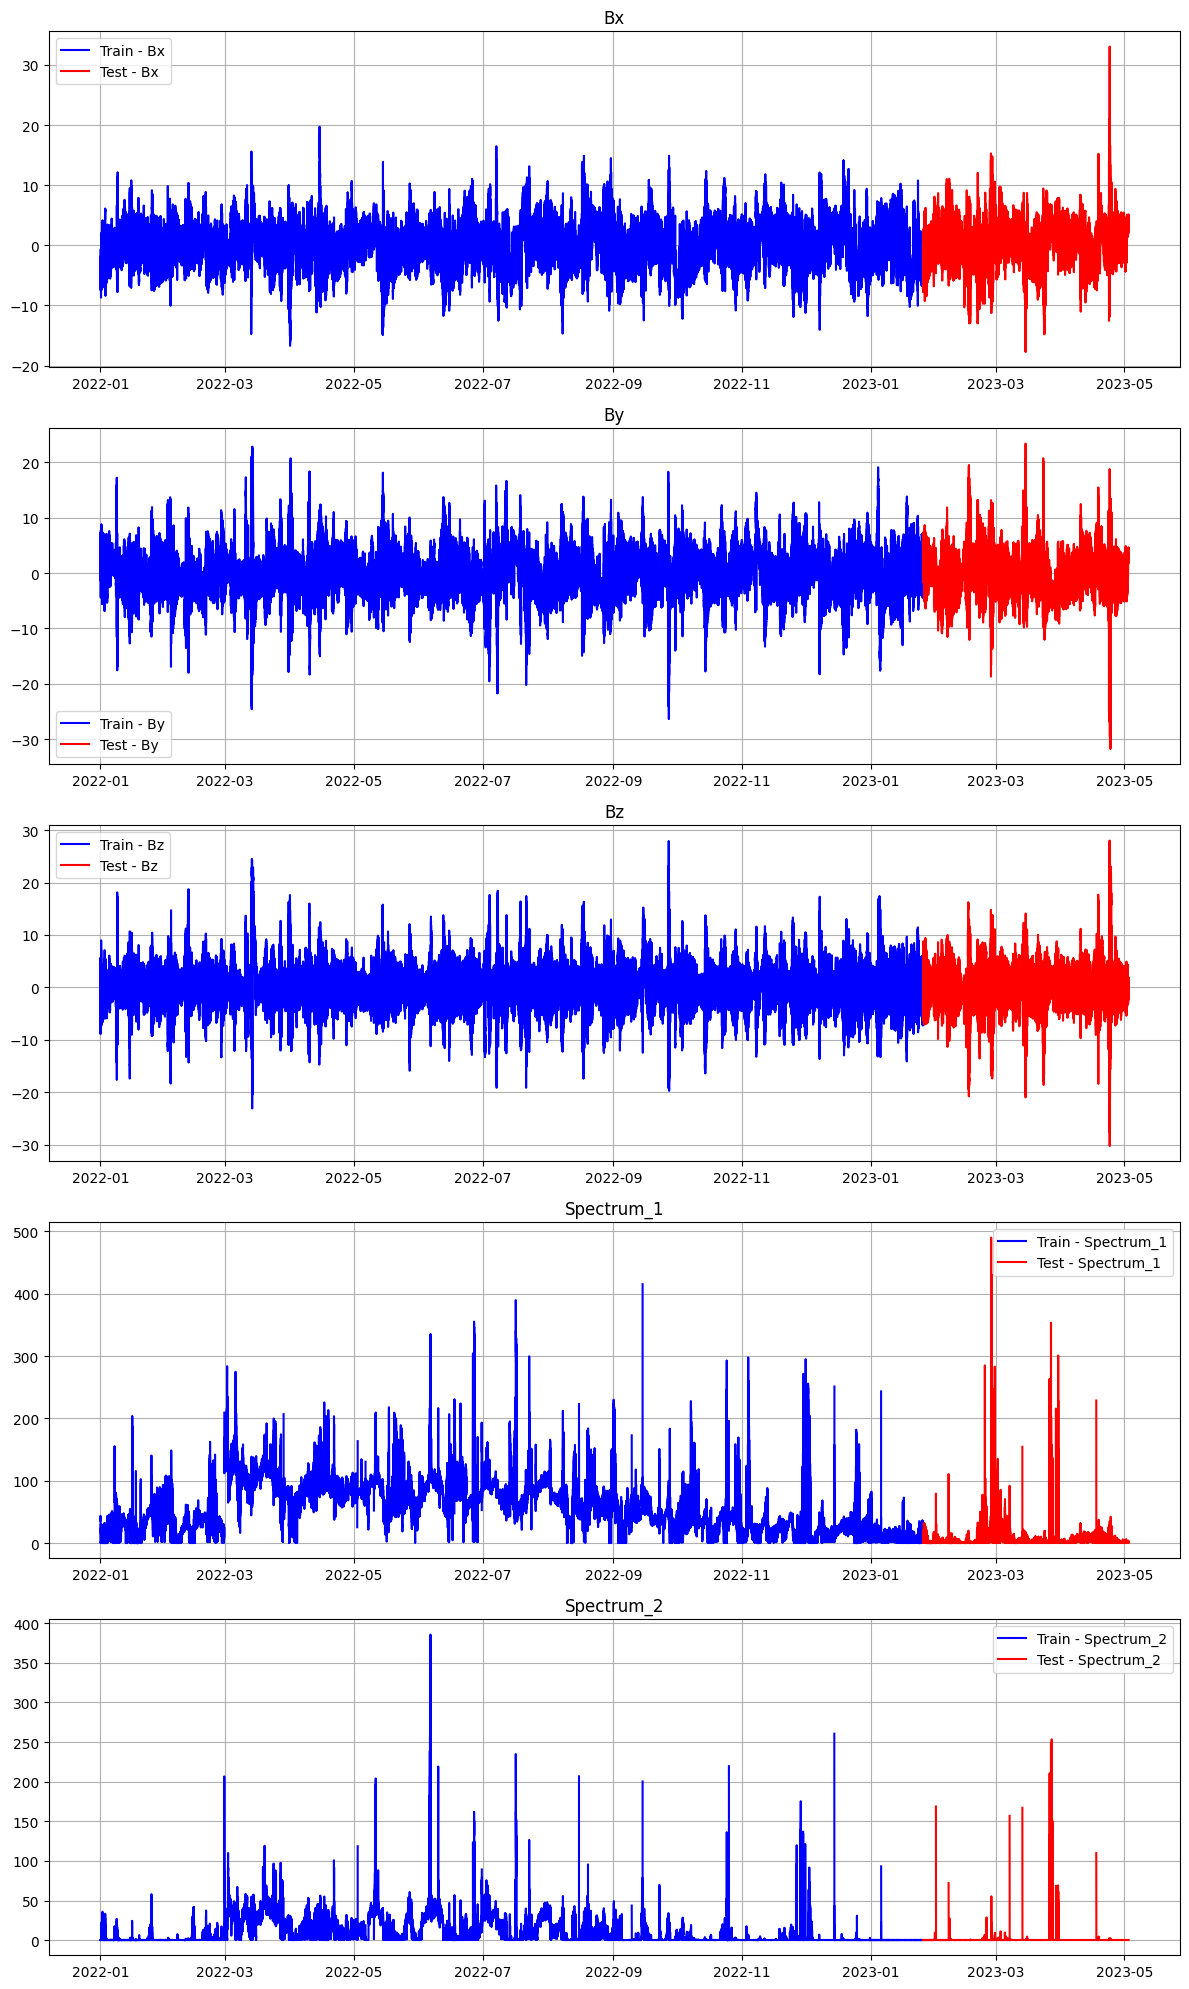

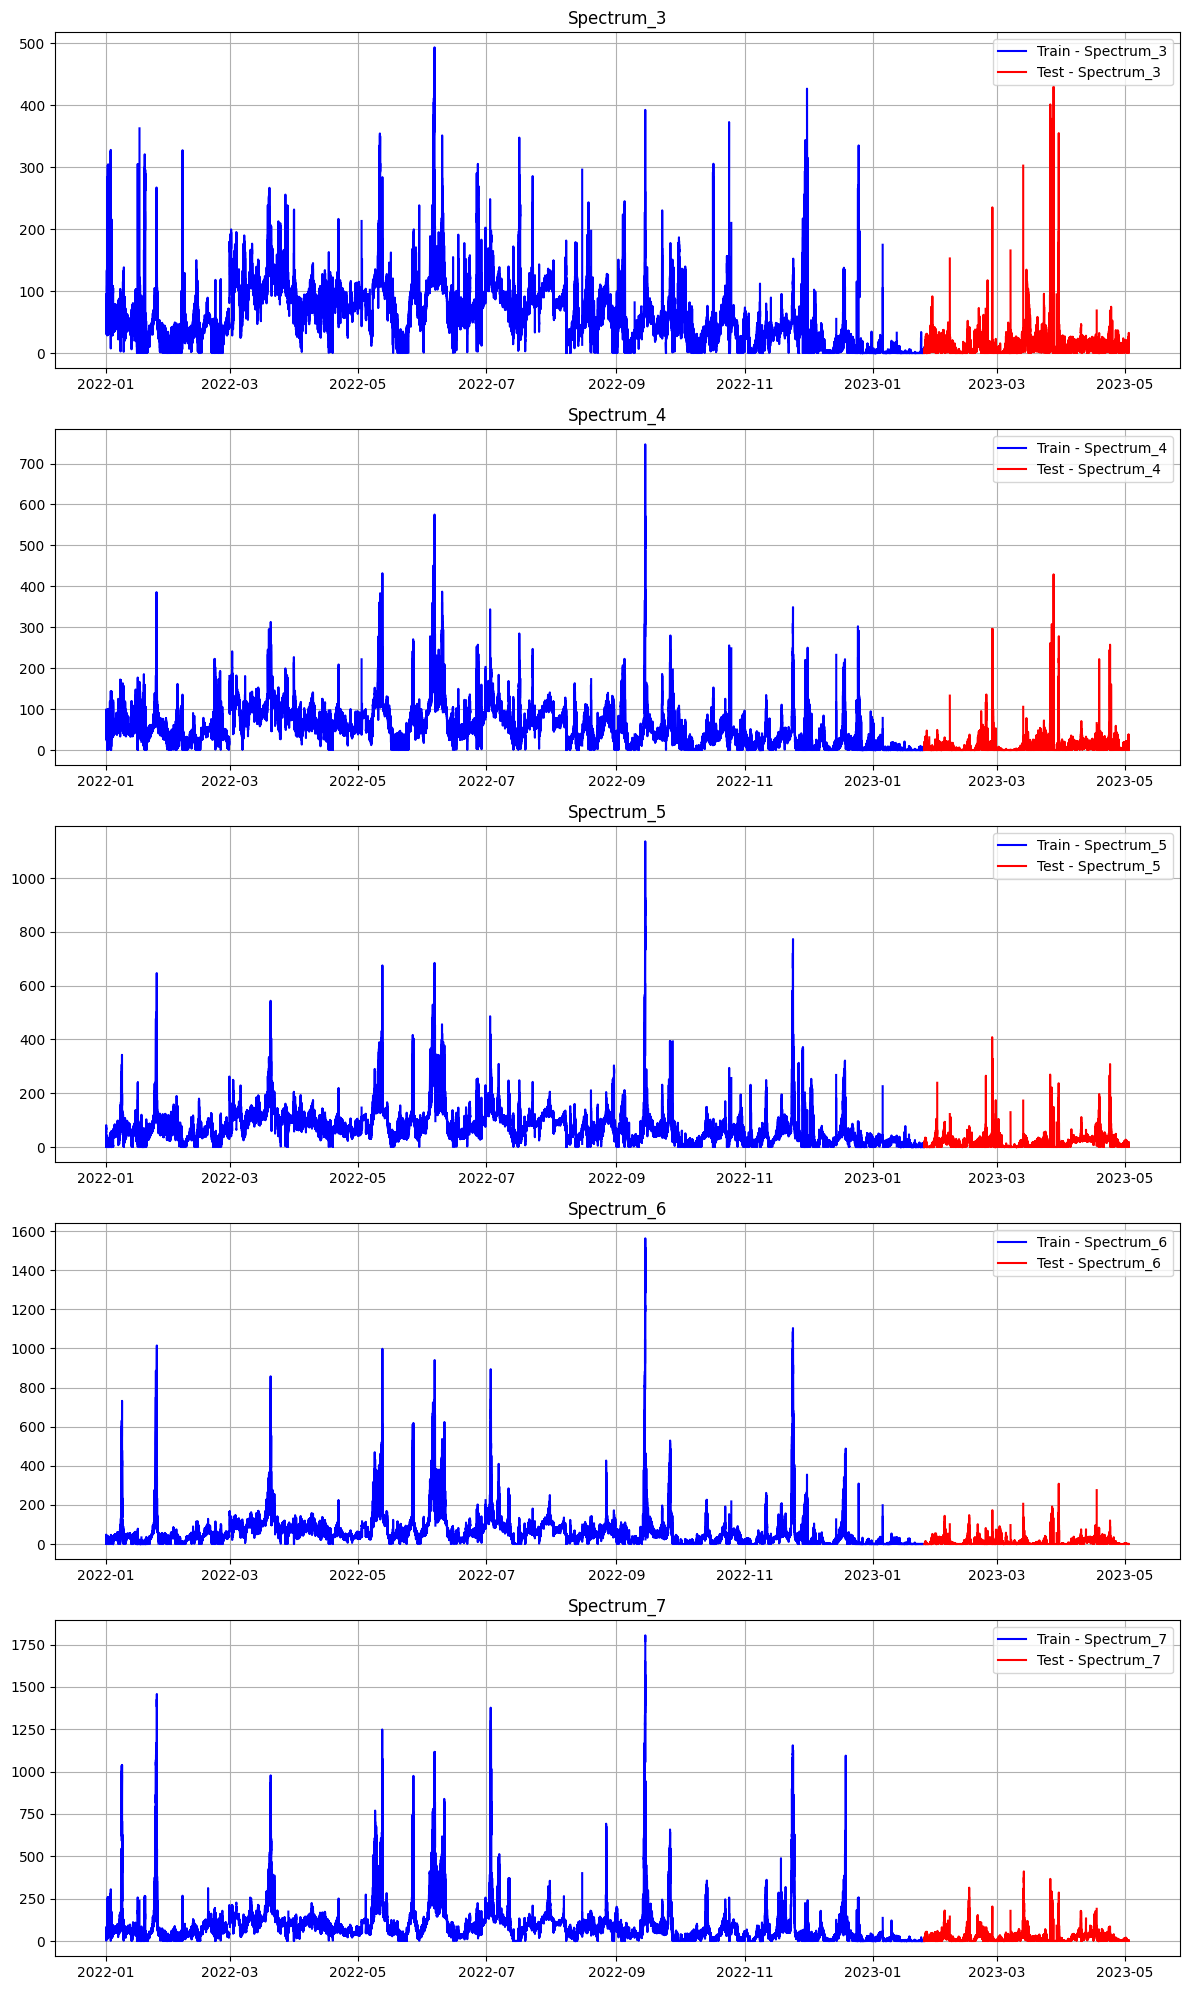

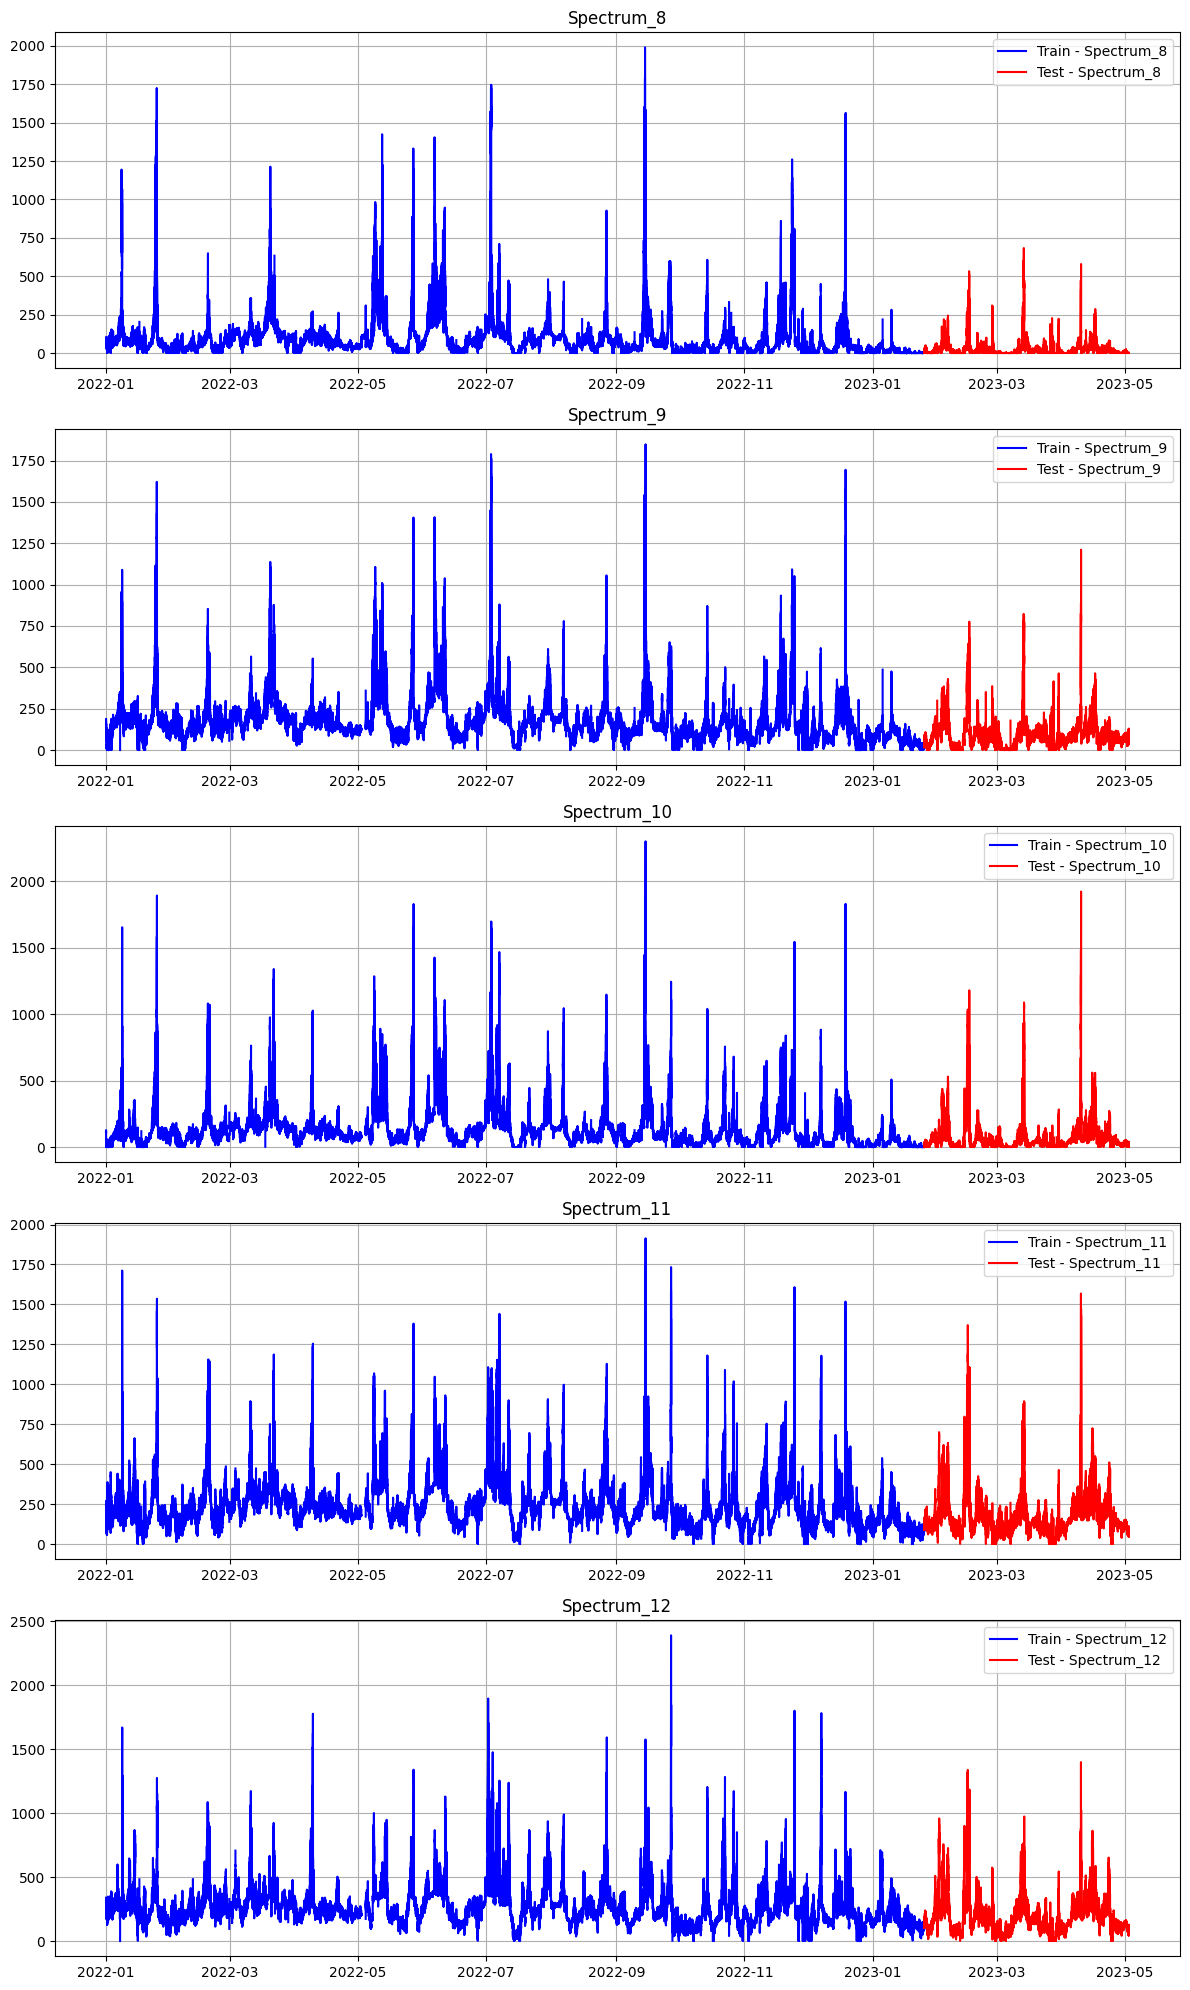

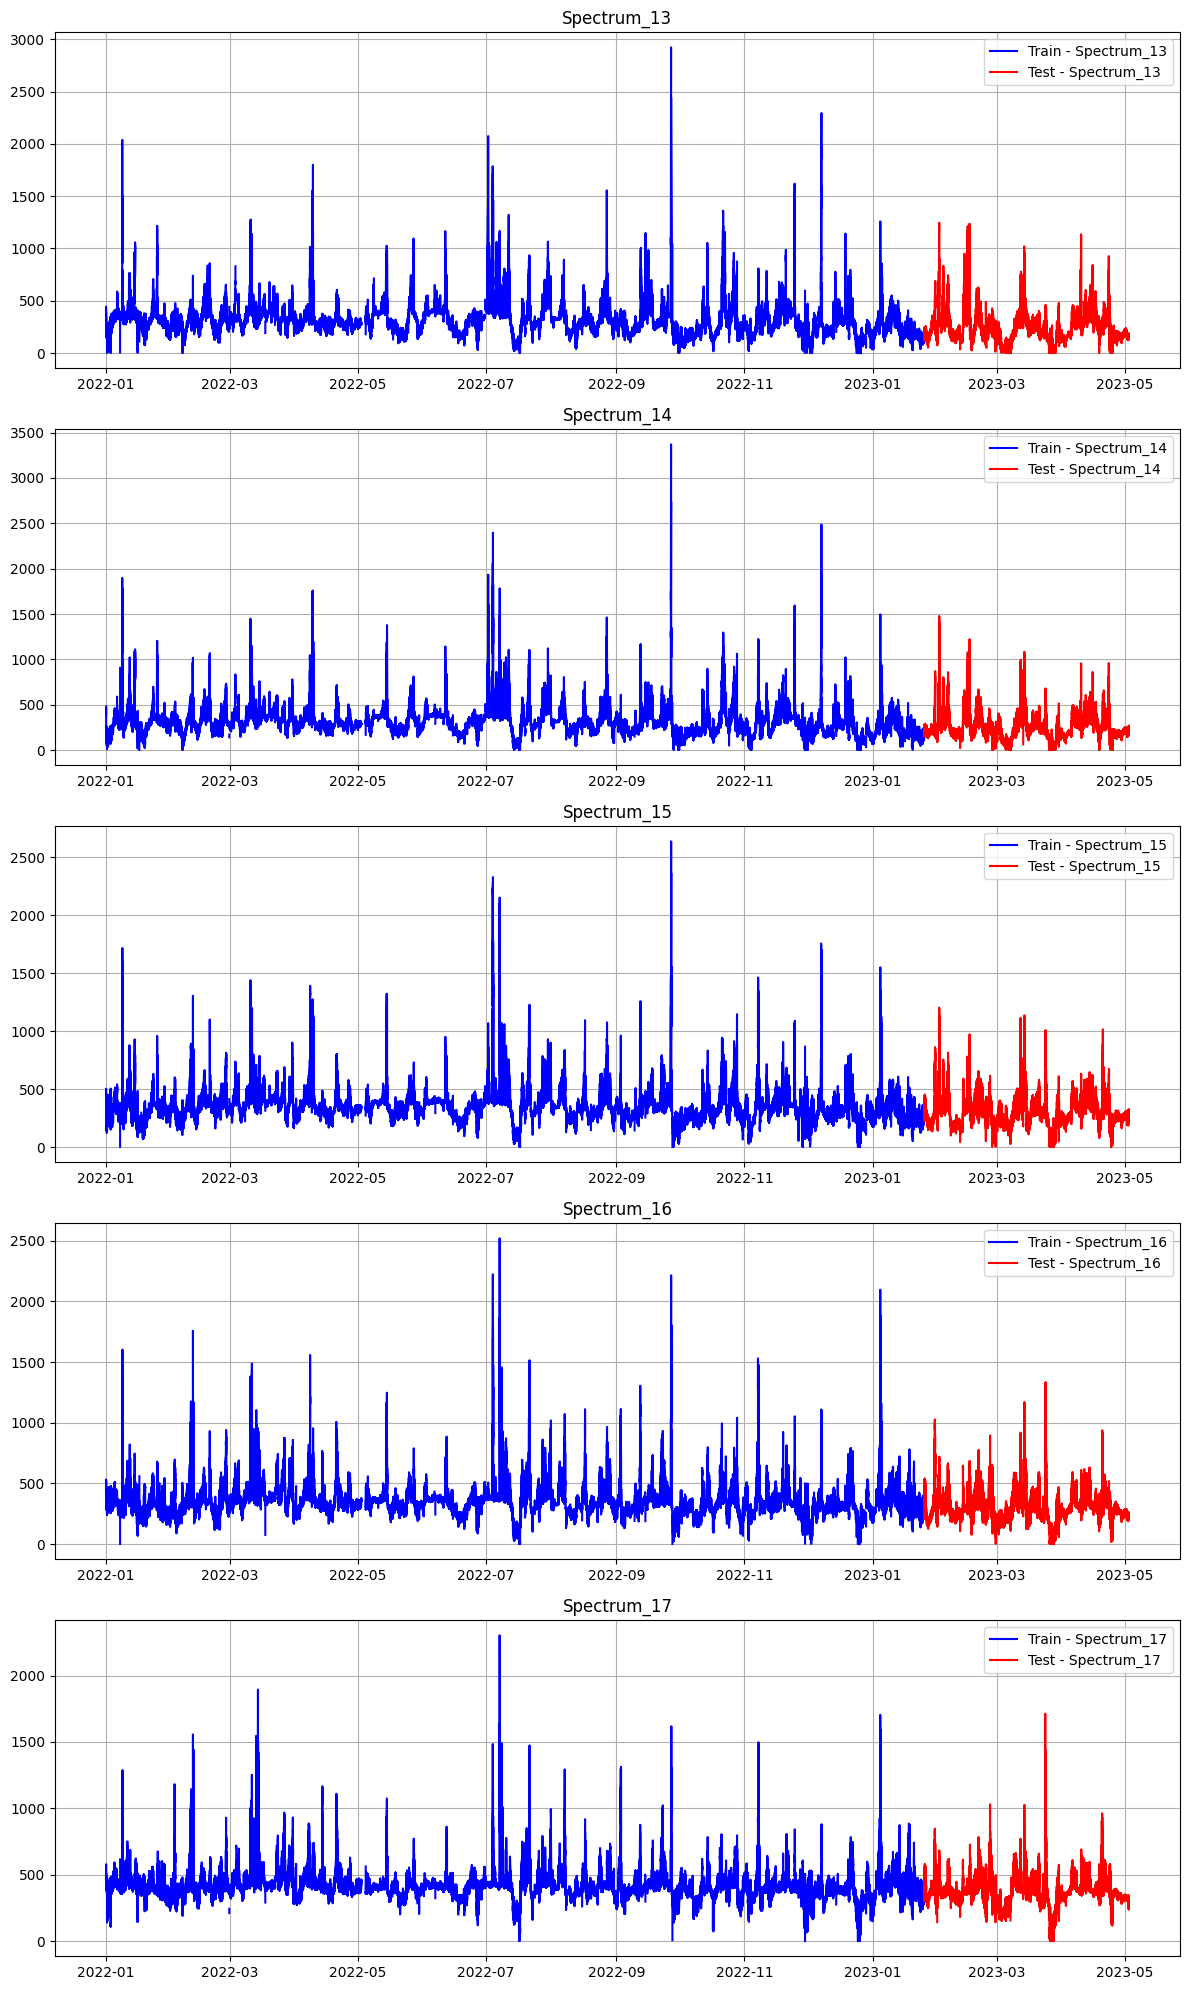

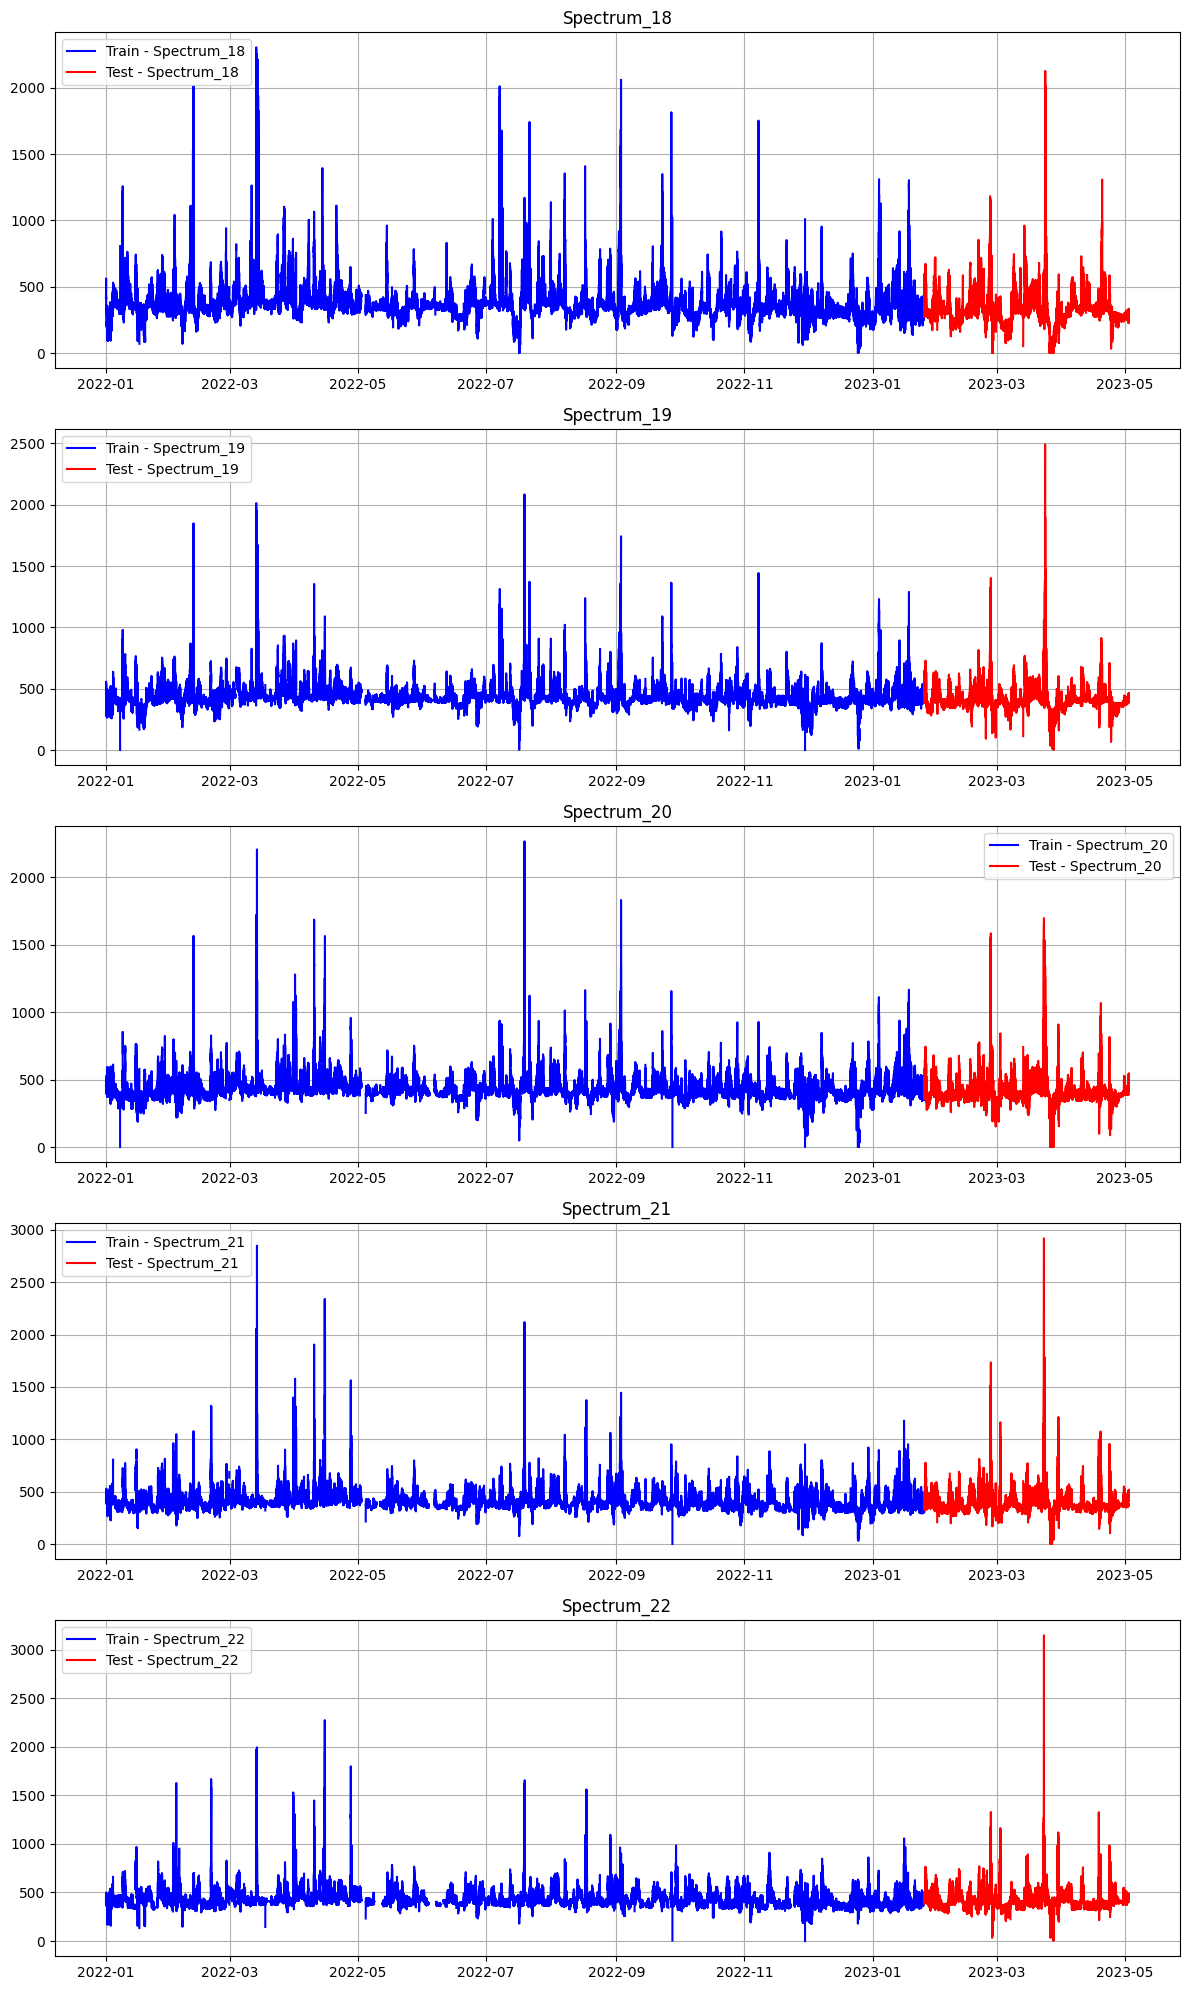

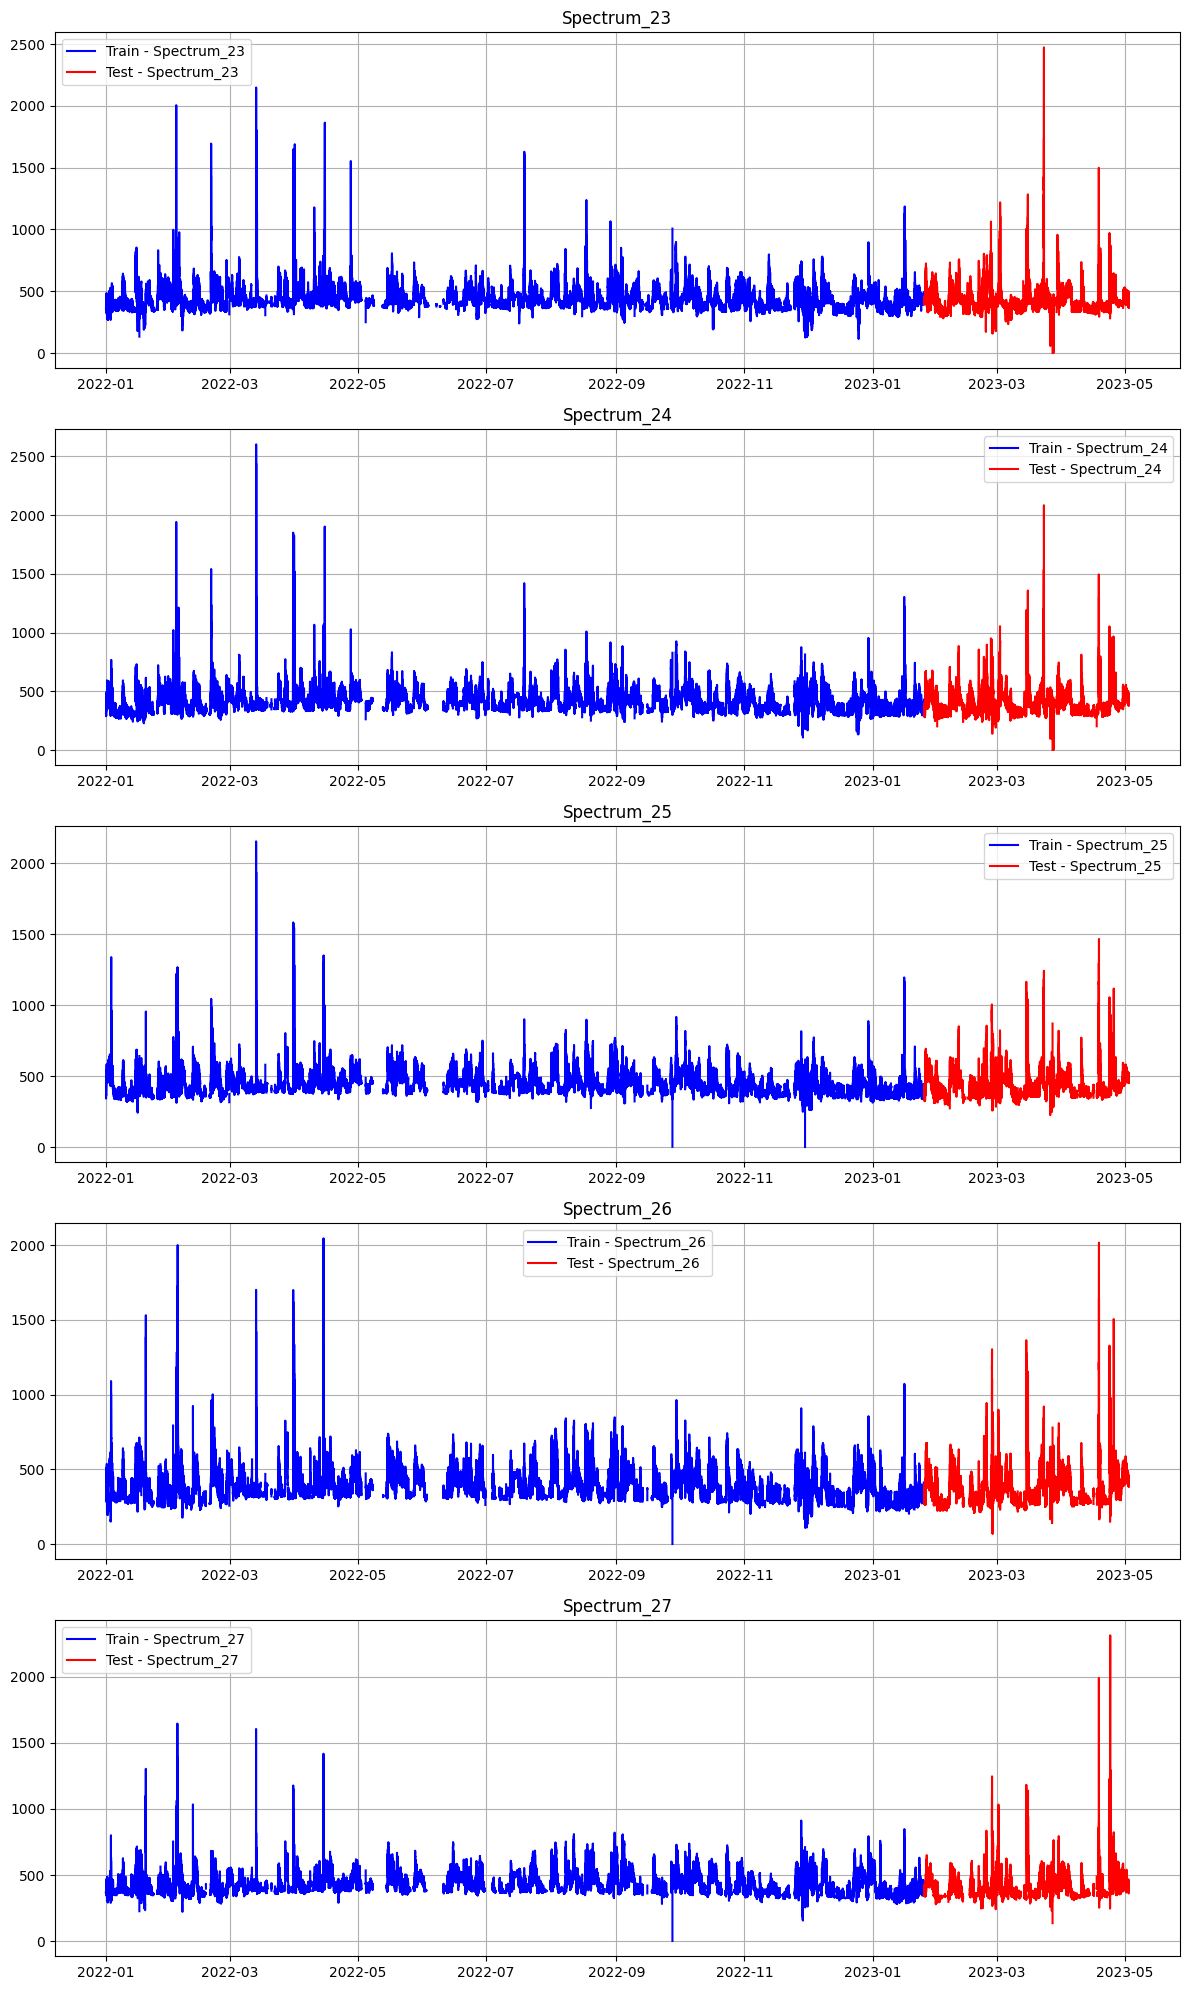

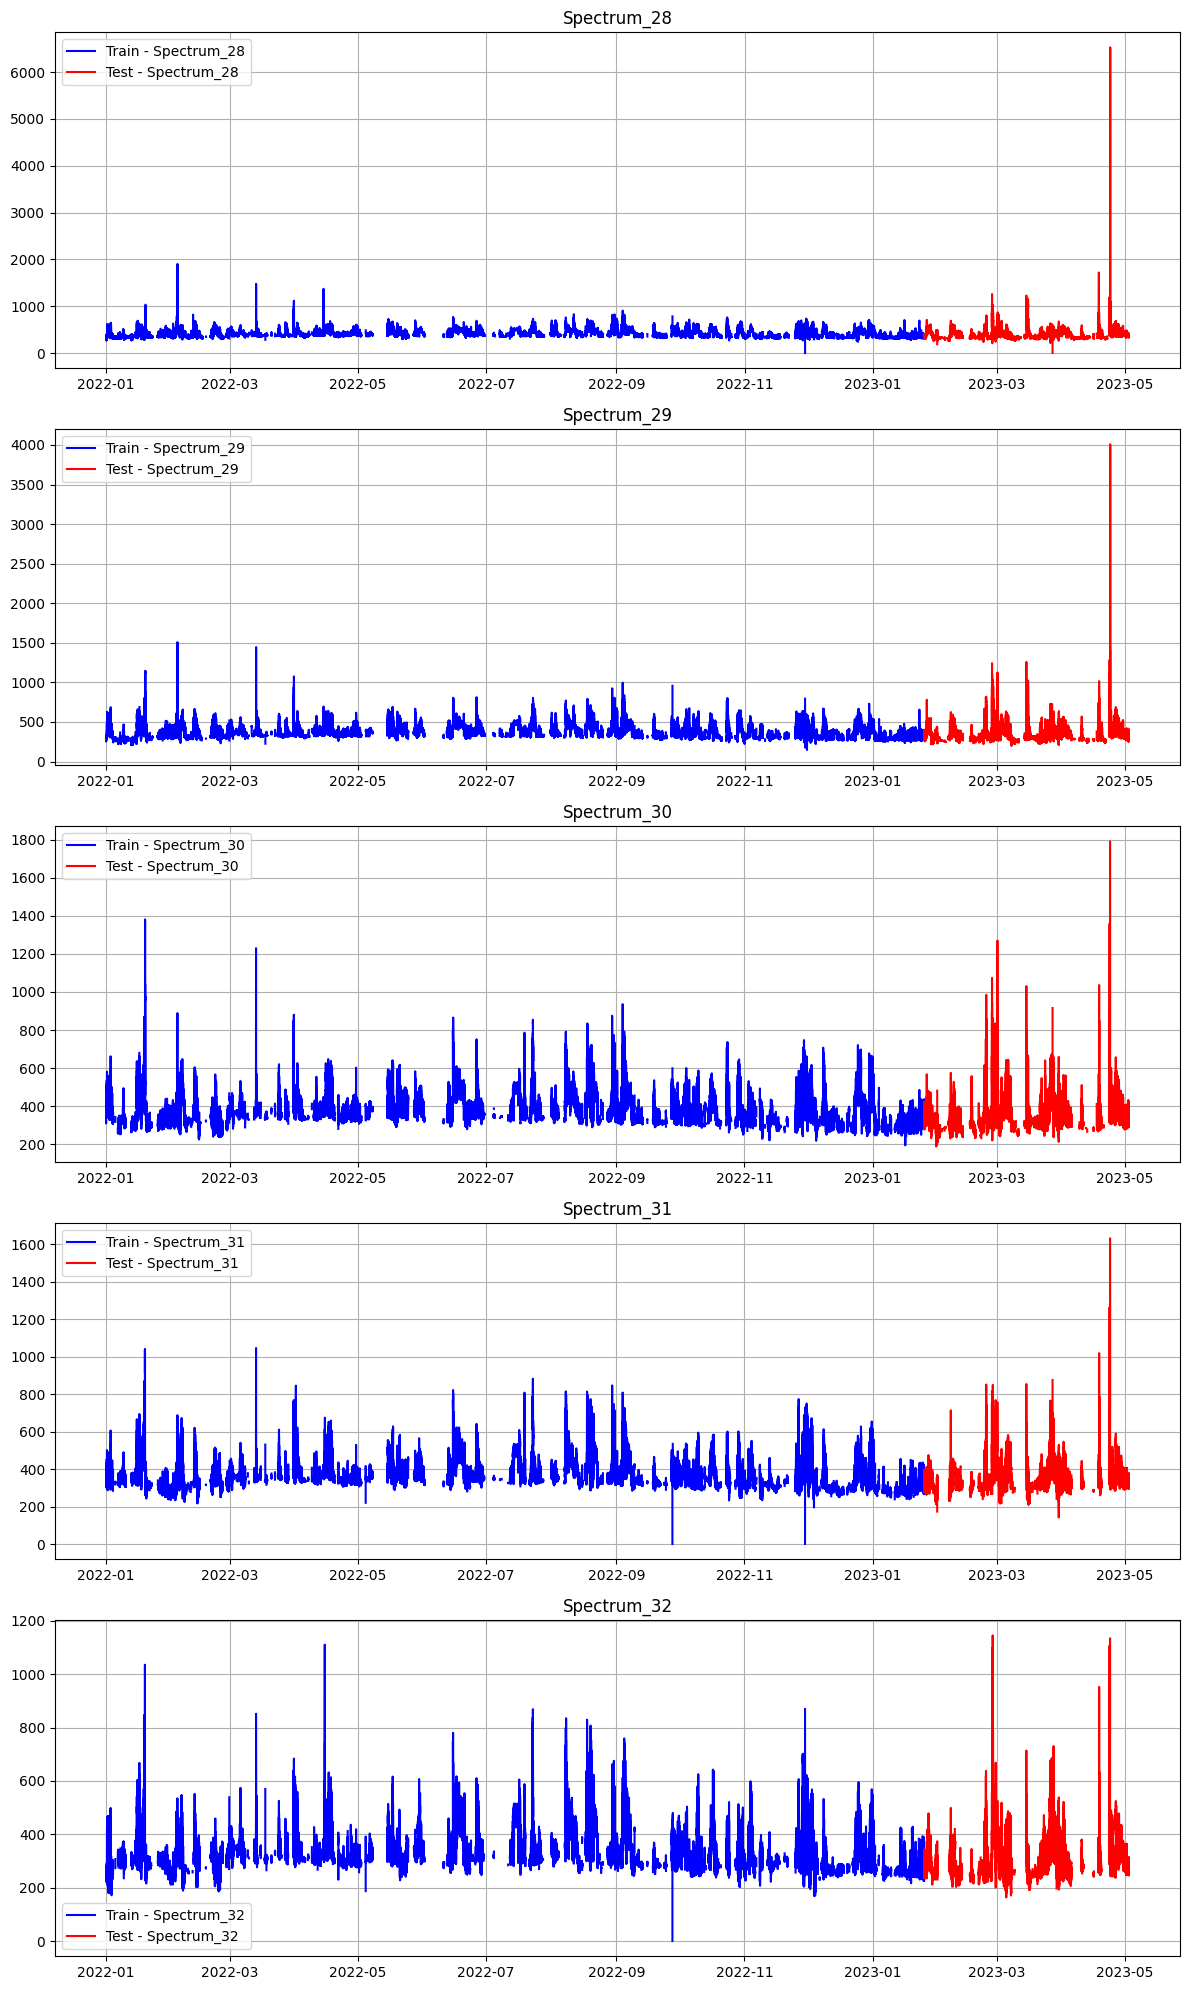

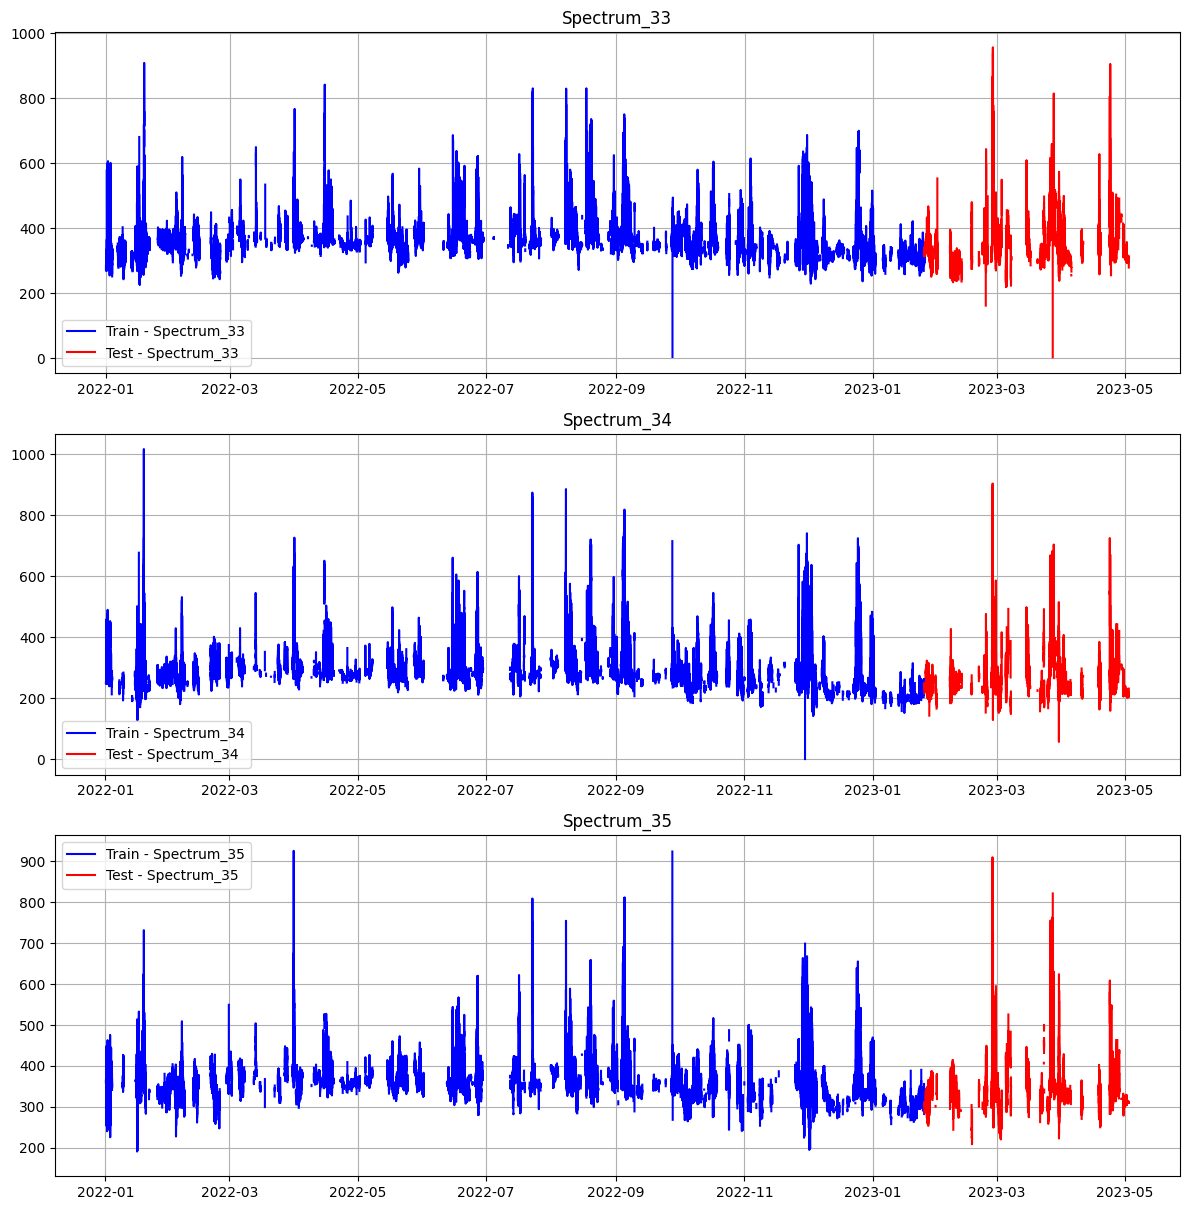

In [ ]:
import matplotlib.pyplot as plt

def plot_subset_features(train_df, test_df, features_per_subset=5):

    features = [col for col in train_df.columns if col != 'Time']
    num_features = len(features)

    num_subsets = num_features // features_per_subset
    if num_features % features_per_subset != 0:
        num_subsets += 1

    for subset_num in range(num_subsets):
        start_idx = subset_num * features_per_subset
        end_idx = start_idx + features_per_subset

        plt.figure(figsize=(12, 4 * features_per_subset))

        for idx, column in enumerate(features[start_idx:end_idx], start=1):
            plt.subplot(features_per_subset, 1, idx)
            plt.plot(train_df['Time'], train_df[column], label=f'Train - {column}', color='blue')
            plt.plot(test_df['Time'], test_df[column], label=f'Test - {column}', color='red')
            plt.title(column)
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        plt.show()

plot_subset_features(train_df, test_df)


In [ ]:
datetime_train = train_df[['Time']]
datetime_test = test_df[['Time']]

In [ ]:
datetime_train

Time
0      2022-01-01 00:00:00
1      2022-01-01 00:01:00
2      2022-01-01 00:02:00
3      2022-01-01 00:03:00
4      2022-01-01 00:04:00
...                    ...
561019 2023-01-25 14:19:00
561020 2023-01-25 14:20:00
561021 2023-01-25 14:21:00
561022 2023-01-25 14:22:00
561023 2023-01-25 14:23:00

[561024 rows x 1 columns]

In [ ]:
datetime_test

Time
561024 2023-01-25 14:24:00
561025 2023-01-25 14:25:00
561026 2023-01-25 14:26:00
561027 2023-01-25 14:27:00
561028 2023-01-25 14:28:00
...                    ...
701275 2023-05-02 23:55:00
701276 2023-05-02 23:56:00
701277 2023-05-02 23:57:00
701278 2023-05-02 23:58:00
701279 2023-05-02 23:59:00

[140256 rows x 1 columns]

In [ ]:
train_df_without_datetime = train_df.drop(columns=['Time'])
test_df_without_datetime = test_df.drop(columns=['Time'])


In [ ]:
train_df_without_datetime

Bx        By        Bz  Spectrum_1  Spectrum_2  Spectrum_3  \
0      -6.17170  1.124830 -4.902280   38.031400    0.231726   46.042700   
1      -6.28883  1.233130 -4.790010   38.386800    0.231726   45.525700   
2      -6.11811  0.871923 -5.128300   37.563600    0.231726   45.195500   
3      -6.28704  1.249870 -4.766400   38.109400    0.242084   46.708300   
4      -6.42125  1.171560 -4.532300   37.589300    0.231726   47.488800   
...         ...       ...       ...         ...         ...         ...   
561019 -4.69021  2.682070 -4.678460    1.104000    0.231726    0.231726   
561020 -5.32840  5.451240 -1.598820    1.071750    0.231726    0.231726   
561021 -4.87932  5.876550 -0.910954    1.102590    0.231726    0.231726   
561022 -5.40087  5.134730 -2.303170    0.977068    0.231726    0.231726   
561023 -5.27938  5.081470 -2.675160    1.090680    0.231726    0.231726   

        Spectrum_4  Spectrum_5  Spectrum_6  Spectrum_7  ...  Spectrum_26  \
0        44.974300   55.914300   43.706900   65.953700  ...      292.860   
1        46.258700   55.142800   43.276800   65.272000  ...      294.536   
2        46.822200   55.748400   42.789400   61.460100  ...      293.292   
3        47.171300   53.538000   42.155800   63.757300  ...      289.523   
4        45.323400   54.540400   44.277300   69.990800  ...      291.441   
...            ...         ...         ...         ...  ...          ...   
561019    0.231726    0.231726    0.231726    0.231726  ...      371.828   
561020    0.231726    0.231726    0.231726    0.231726  ...      371.031   
561021    0.231726    0.231726    0.231726    0.231726  ...      367.759   
561022    0.231726    0.231726    0.231726    0.231726  ...      372.015   
561023    0.231726    0.231726    0.231726    0.231726  ...      372.536   

        Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
0               NaN          NaN          NaN          NaN          NaN   
1               NaN          NaN          NaN          NaN          NaN   
2           372.415          NaN          NaN          NaN          NaN   
3           372.449          NaN          NaN          NaN          NaN   
4               NaN          NaN          NaN          NaN          NaN   
...             ...          ...          ...          ...          ...   
561019      420.100      393.101      389.963      406.705      392.209   
561020      419.701      395.212      390.501      406.612      392.976   
561021      417.447      393.816      390.038      406.523      391.818   
561022      420.369      394.736      391.246      407.967      393.092   
561023      421.024      395.310      390.794      406.869      392.097   

        Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
0               NaN          NaN          NaN          NaN  
1               NaN          NaN          NaN          NaN  
2               NaN          NaN          NaN          NaN  
3               NaN          NaN          NaN          NaN  
4               NaN          NaN          NaN          NaN  
...             ...          ...          ...          ...  
561019      325.673      315.689      234.408      303.813  
561020      324.858      314.740      236.307      307.446  
561021      323.471      314.983      234.546      306.583  
561022      324.144      314.554      234.851      306.211  
561023      324.658      314.377      235.788      306.026  

[561024 rows x 38 columns]

In [ ]:
test_df_without_datetime

Bx       By        Bz  Spectrum_1  Spectrum_2  Spectrum_3  \
561024 -4.97515  5.39893 -2.522170    1.010980    0.231726    0.231726   
561025 -5.04051  5.26649 -2.626630    1.001820    0.231726    0.231726   
561026 -5.09986  4.81657 -3.194420    0.908124    0.231726    0.231726   
561027 -5.02919  5.09473 -2.946440    1.170690    0.231726    0.231726   
561028 -4.94821  3.19904 -4.825090    1.028880    0.231726    0.231726   
...         ...      ...       ...         ...         ...         ...   
701275  4.33665  2.80127  0.954633    1.004790    0.231726    4.647570   
701276  4.66778  2.10582  1.260660    0.781621    0.231726    5.972220   
701277  4.28322  3.02154  0.927773    0.854185    0.231726    8.104540   
701278  4.31376  2.67727  1.723270    0.801559    0.231726   12.762100   
701279  4.51542  2.30317  1.832570    2.265740    0.231726   11.687000   

        Spectrum_4  Spectrum_5  Spectrum_6  Spectrum_7  ...  Spectrum_26  \
561024    0.231726    0.231726    0.231726    0.231726  ...      371.119   
561025    0.231726    0.231726    0.231726    0.231726  ...      368.658   
561026    0.231726    0.231726    0.231726    0.231726  ...      372.062   
561027    0.231726    0.231726    0.231726    0.231726  ...      368.826   
561028    0.231726    0.231726    0.231726    0.231726  ...      366.079   
...            ...         ...         ...         ...  ...          ...   
701275    0.626576    3.545950    0.231726    1.795390  ...      394.482   
701276    0.360648    3.391430    0.231726    0.506513  ...      399.579   
701277    2.025800    4.220000    0.231726    2.344650  ...      395.917   
701278    2.818550    4.822420    0.301864    0.355221  ...      404.723   
701279    1.892900    2.393840    0.231726    2.772970  ...      394.037   

        Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
561024      422.007      394.182      390.461      408.324      392.325   
561025      419.116      394.248      390.320      407.562      392.088   
561026      419.719      392.879      389.211      406.424      390.993   
561027      420.895      396.763      390.754      406.785      392.562   
561028      417.072      390.685      391.277      407.166      391.416   
...             ...          ...          ...          ...          ...   
701275      400.994      370.400      299.219      311.428      304.097   
701276      406.916      376.353      302.127      315.270      303.676   
701277      403.935      373.078      304.609      317.534      311.326   
701278      412.977      375.604      299.132      318.317      317.727   
701279      403.535      382.796      311.968      325.240      307.657   

        Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
561024      323.891      314.302      234.441      306.217  
561025      323.368      313.718      233.005      305.113  
561026      322.303      314.215      233.246      305.649  
561027      321.343      314.848      234.065      306.380  
561028      322.544      314.308      234.797      306.289  
...             ...          ...          ...          ...  
701275      254.954          NaN          NaN          NaN  
701276      256.081          NaN          NaN          NaN  
701277      252.661          NaN          NaN          NaN  
701278      261.104          NaN          NaN          NaN  
701279      249.177          NaN          NaN          NaN  

[140256 rows x 38 columns]

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='mean')

train_imputed = imputer.fit_transform(train_df_without_datetime)
test_imputed = imputer.transform(test_df_without_datetime)

train_df_imputed = pd.DataFrame(train_imputed, columns=train_df_without_datetime.columns)
test_df_imputed = pd.DataFrame(test_imputed, columns=test_df_without_datetime.columns)

train_df_imputed = pd.concat([datetime_train.reset_index(drop=True), train_df_imputed], axis=1)
test_df_imputed = pd.concat([datetime_test.reset_index(drop=True), test_df_imputed], axis=1)


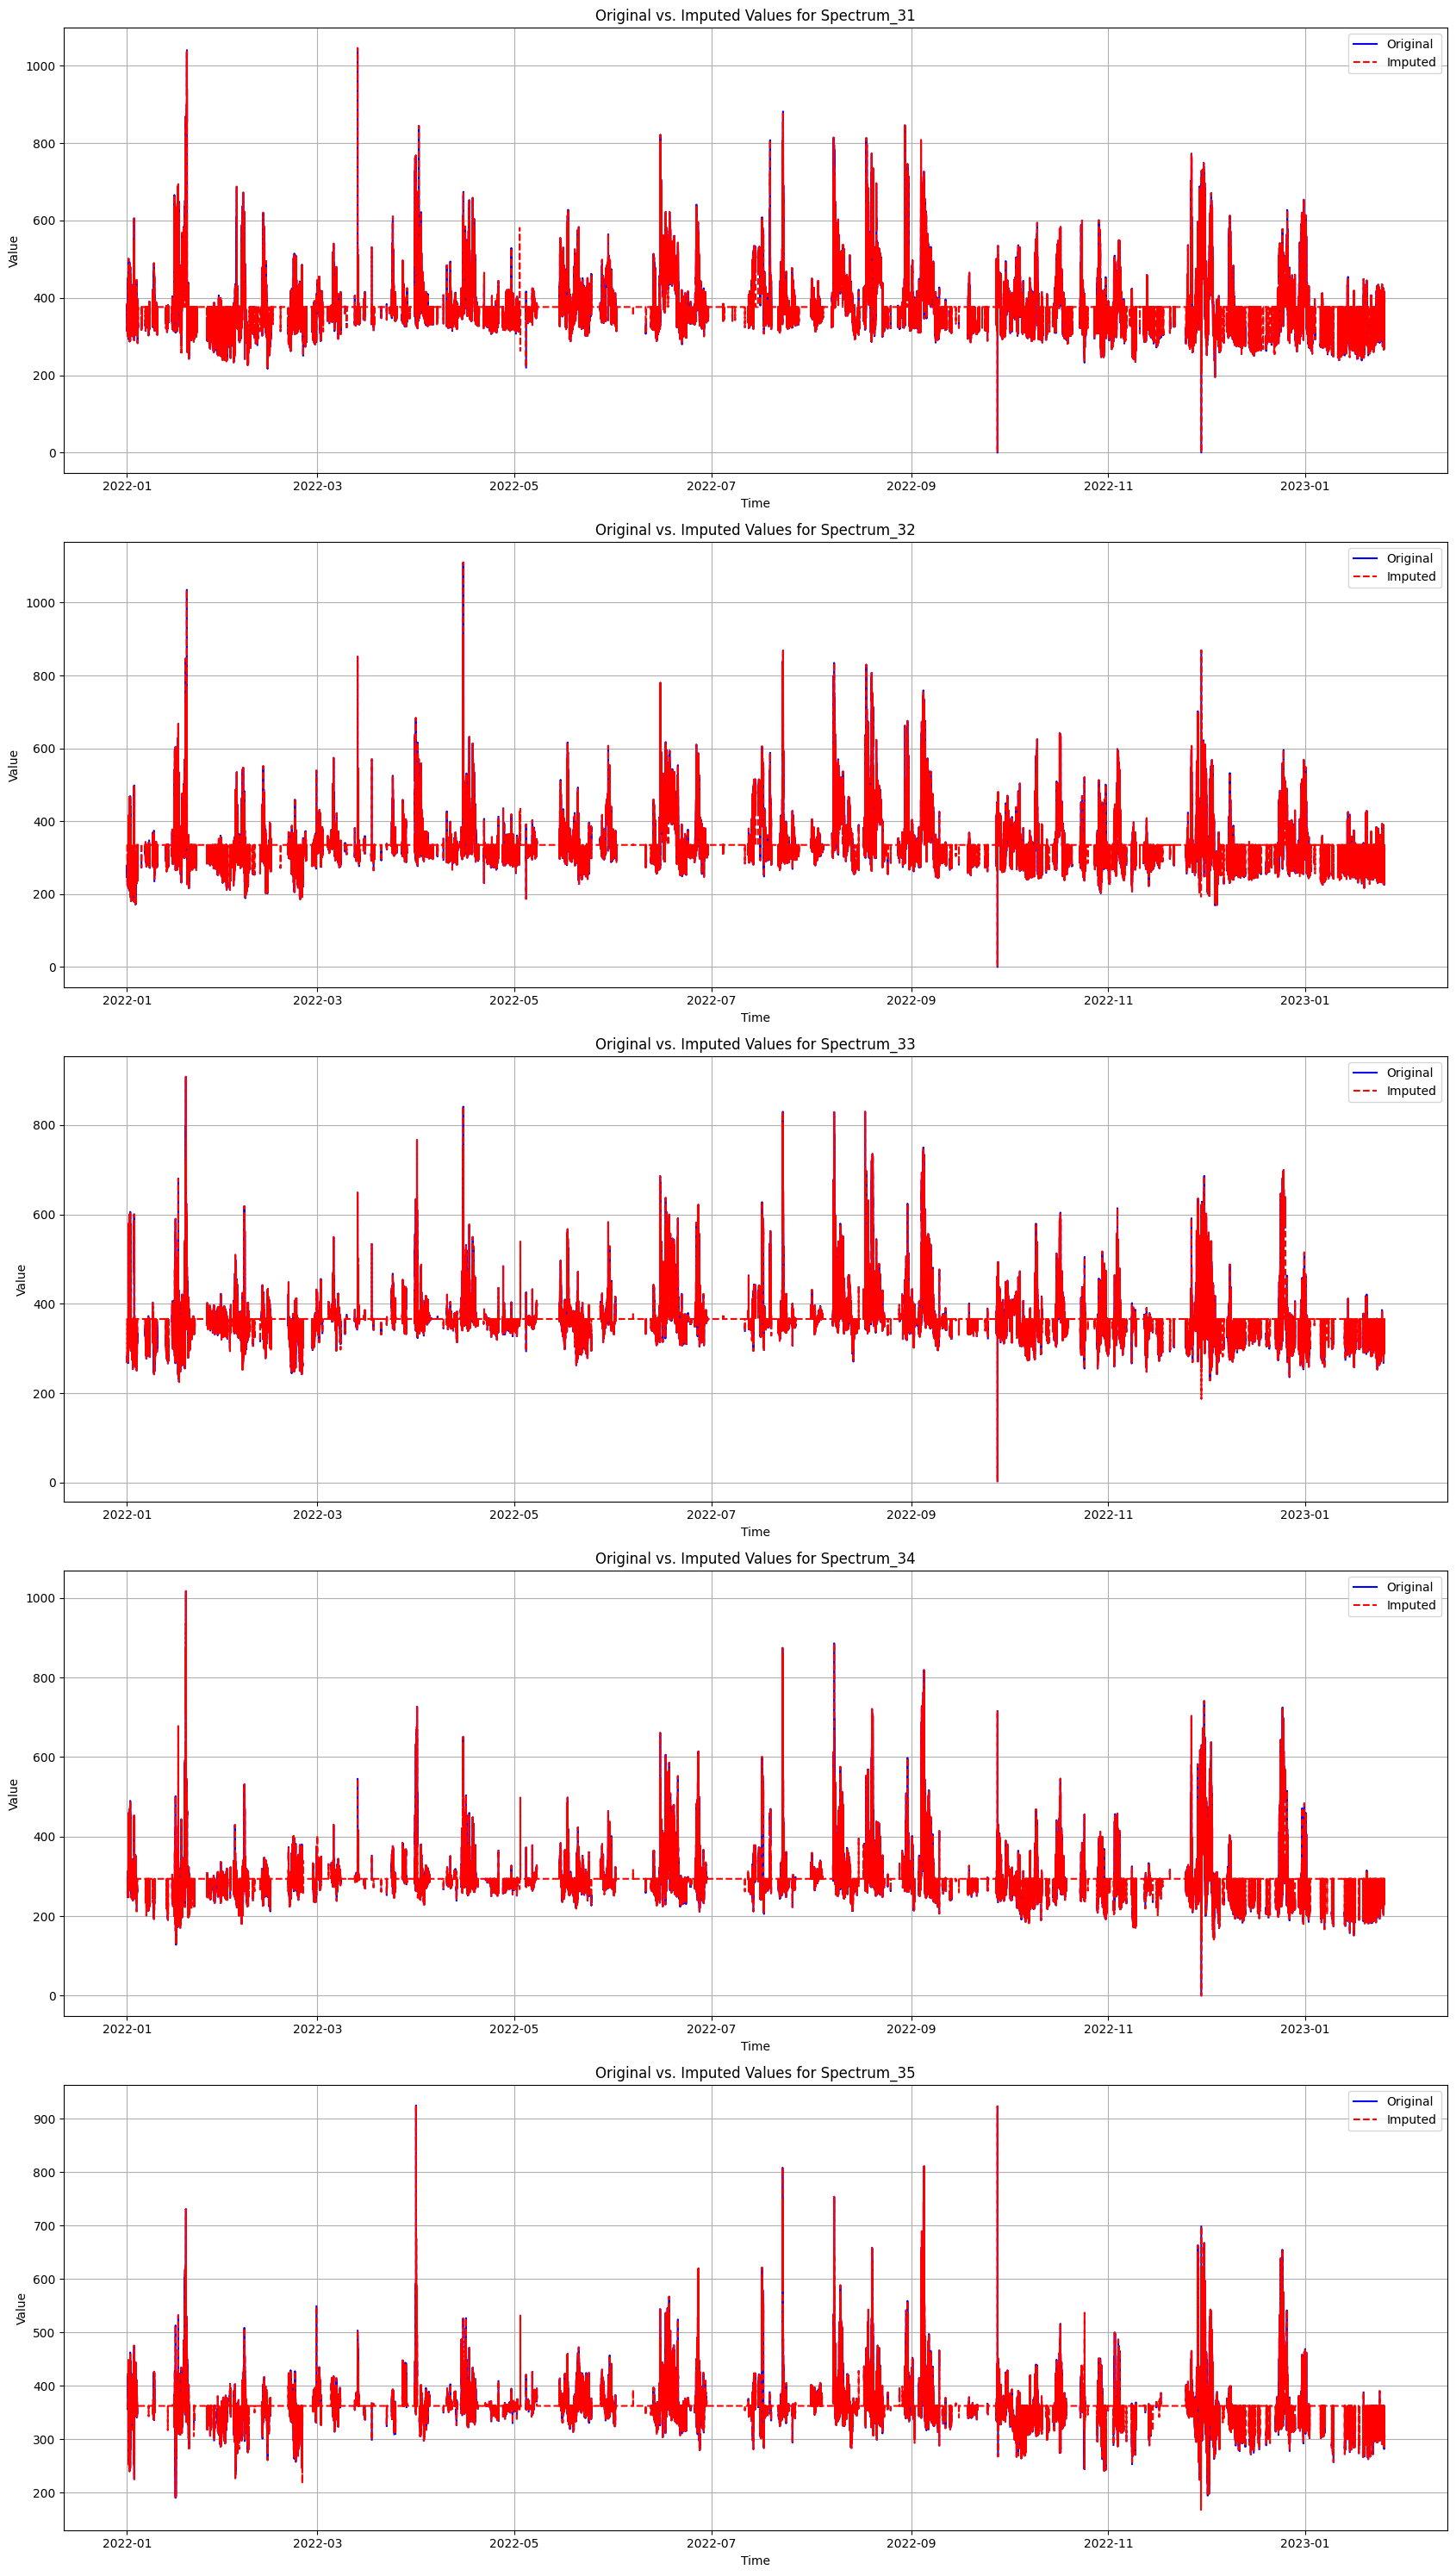

In [ ]:
last_columns = [col for col in train_df_imputed.columns if col != 'Time'][-5:]

plt.figure(figsize=(17, 6 * len(last_columns)))

for idx, column in enumerate(last_columns):
    plt.subplot(len(last_columns), 1, idx + 1)

    plt.plot(train_df_imputed['Time'], train_df_without_datetime[column], label='Original', color='blue')
    plt.plot(train_df_imputed['Time'], train_df_imputed[column], label='Imputed', color='red', linestyle='--')

    plt.title(f'Original vs. Imputed Values for {column}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()


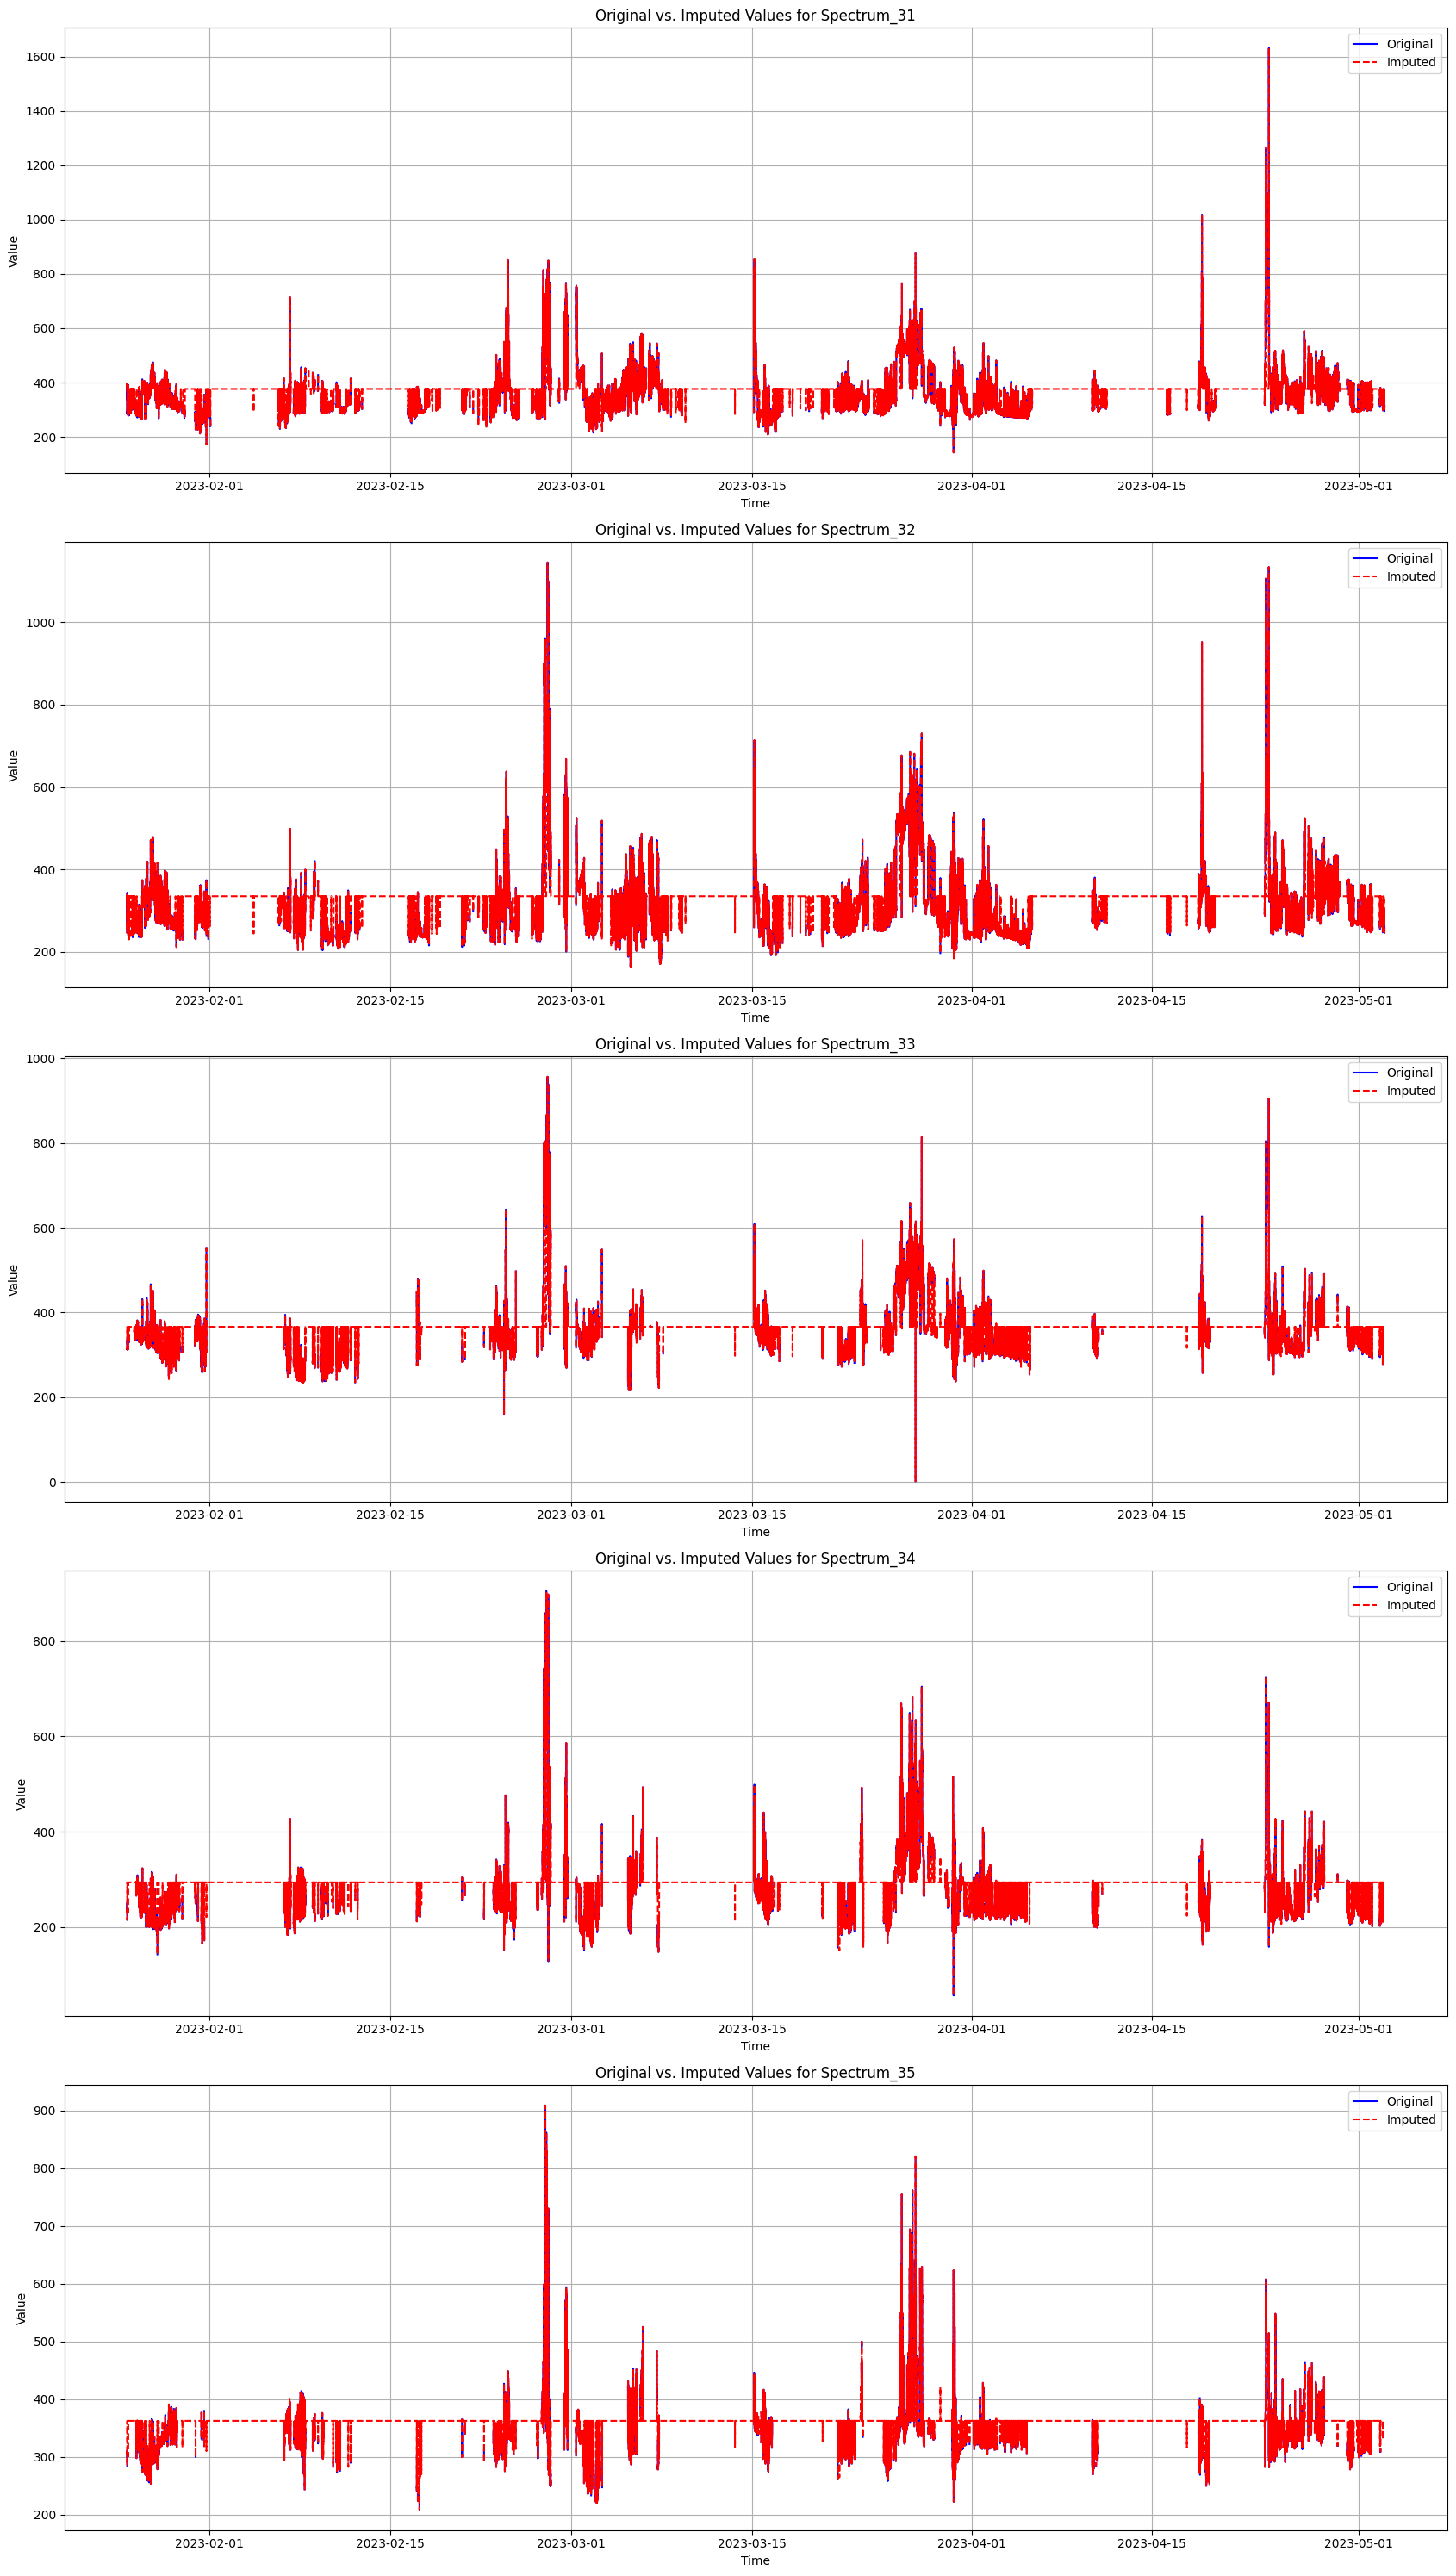

In [ ]:
last_columns = [col for col in test_df_imputed.columns if col != 'Time'][-5:]

plt.figure(figsize=(17, 6 * len(last_columns)))

for idx, column in enumerate(last_columns):
    plt.subplot(len(last_columns), 1, idx + 1)

    plt.plot(test_df_imputed['Time'], test_df_without_datetime[column], label='Original', color='blue')
    plt.plot(test_df_imputed['Time'], test_df_imputed[column], label='Imputed', color='red', linestyle='--')

    plt.title(f'Original vs. Imputed Values for {column}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
combined_df = pd.concat([train_df_imputed, test_df_imputed], axis=0).reset_index(drop=True)

In [ ]:
combined_df.to_csv('/content/drive/MyDrive/NASA/combined_data.csv', index=False)


In [ ]:
corrected_mean= pd.read_csv('/content/drive/MyDrive/NASA/combined_data.csv')

In [ ]:
corrected_mean.head(100)

Time       Bx        By        Bz  Spectrum_1  Spectrum_2  \
0   2022-01-01 00:00:00 -6.17170  1.124830 -4.902280     38.0314    0.231726   
1   2022-01-01 00:01:00 -6.28883  1.233130 -4.790010     38.3868    0.231726   
2   2022-01-01 00:02:00 -6.11811  0.871923 -5.128300     37.5636    0.231726   
3   2022-01-01 00:03:00 -6.28704  1.249870 -4.766400     38.1094    0.242084   
4   2022-01-01 00:04:00 -6.42125  1.171560 -4.532300     37.5893    0.231726   
..                  ...      ...       ...       ...         ...         ...   
95  2022-01-01 01:35:00 -4.84912  6.913800  0.618553     35.6936    0.231726   
96  2022-01-01 01:36:00 -3.64632  5.030650  5.513540     37.5411    0.231726   
97  2022-01-01 01:37:00 -3.00274  5.500570  5.507850     36.3243    0.231726   
98  2022-01-01 01:38:00 -4.52453  6.345950  1.094910     32.4569    0.231726   
99  2022-01-01 01:39:00 -5.72279  4.407760 -4.106030     28.8730    0.231726   

    Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  Spectrum_26  \
0      46.0427     44.9743     55.9143     43.7069  ...      292.860   
1      45.5257     46.2587     55.1428     43.2768  ...      294.536   
2      45.1955     46.8222     55.7484     42.7894  ...      293.292   
3      46.7083     47.1713     53.5380     42.1558  ...      289.523   
4      47.4888     45.3234     54.5404     44.2773  ...      291.441   
..         ...         ...         ...         ...  ...          ...   
95     52.1977     51.9282     55.5345     41.1011  ...      296.401   
96     47.0967     44.0884     51.6316     44.9398  ...      285.741   
97     46.6237     43.4160     50.1398     41.7596  ...      287.370   
98     48.2909     45.4446     48.1940     37.9089  ...      296.822   
99     50.9275     47.1048     46.6652     30.8985  ...      339.701   

    Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
0    441.138747   425.866016   384.603241   390.811042   376.460925   
1    441.138747   425.866016   384.603241   390.811042   376.460925   
2    372.415000   425.866016   384.603241   390.811042   376.460925   
3    372.449000   425.866016   384.603241   390.811042   376.460925   
4    441.138747   425.866016   384.603241   390.811042   376.460925   
..          ...          ...          ...          ...          ...   
95   358.279000   320.576000   294.671000   390.811042   376.460925   
96   354.344000   332.296000   290.520000   390.811042   376.460925   
97   353.417000   329.635000   294.151000   390.811042   376.460925   
98   355.496000   329.526000   293.587000   390.811042   376.460925   
99   373.924000   319.543000   289.404000   319.015000   322.584000   

    Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
0    334.885219   366.251985   293.796098   362.483856  
1    334.885219   366.251985   293.796098   362.483856  
2    334.885219   366.251985   293.796098   362.483856  
3    334.885219   366.251985   293.796098   362.483856  
4    334.885219   366.251985   293.796098   362.483856  
..          ...          ...          ...          ...  
95   334.885219   366.251985   293.796098   362.483856  
96   334.885219   366.251985   293.796098   362.483856  
97   334.885219   366.251985   293.796098   362.483856  
98   334.885219   366.251985   293.796098   362.483856  
99   269.236000   366.251985   293.796098   362.483856  

[100 rows x 39 columns]

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='median')

train_imputed1 = imputer.fit_transform(train_df_without_datetime)
test_imputed1 = imputer.transform(test_df_without_datetime)

train_df_imputed1 = pd.DataFrame(train_imputed1, columns=train_df_without_datetime.columns)
test_df_imputed1 = pd.DataFrame(test_imputed1, columns=test_df_without_datetime.columns)

train_df_imputed1 = pd.concat([datetime_train.reset_index(drop=True), train_df_imputed1], axis=1)
test_df_imputed1 = pd.concat([datetime_test.reset_index(drop=True), test_df_imputed1], axis=1)


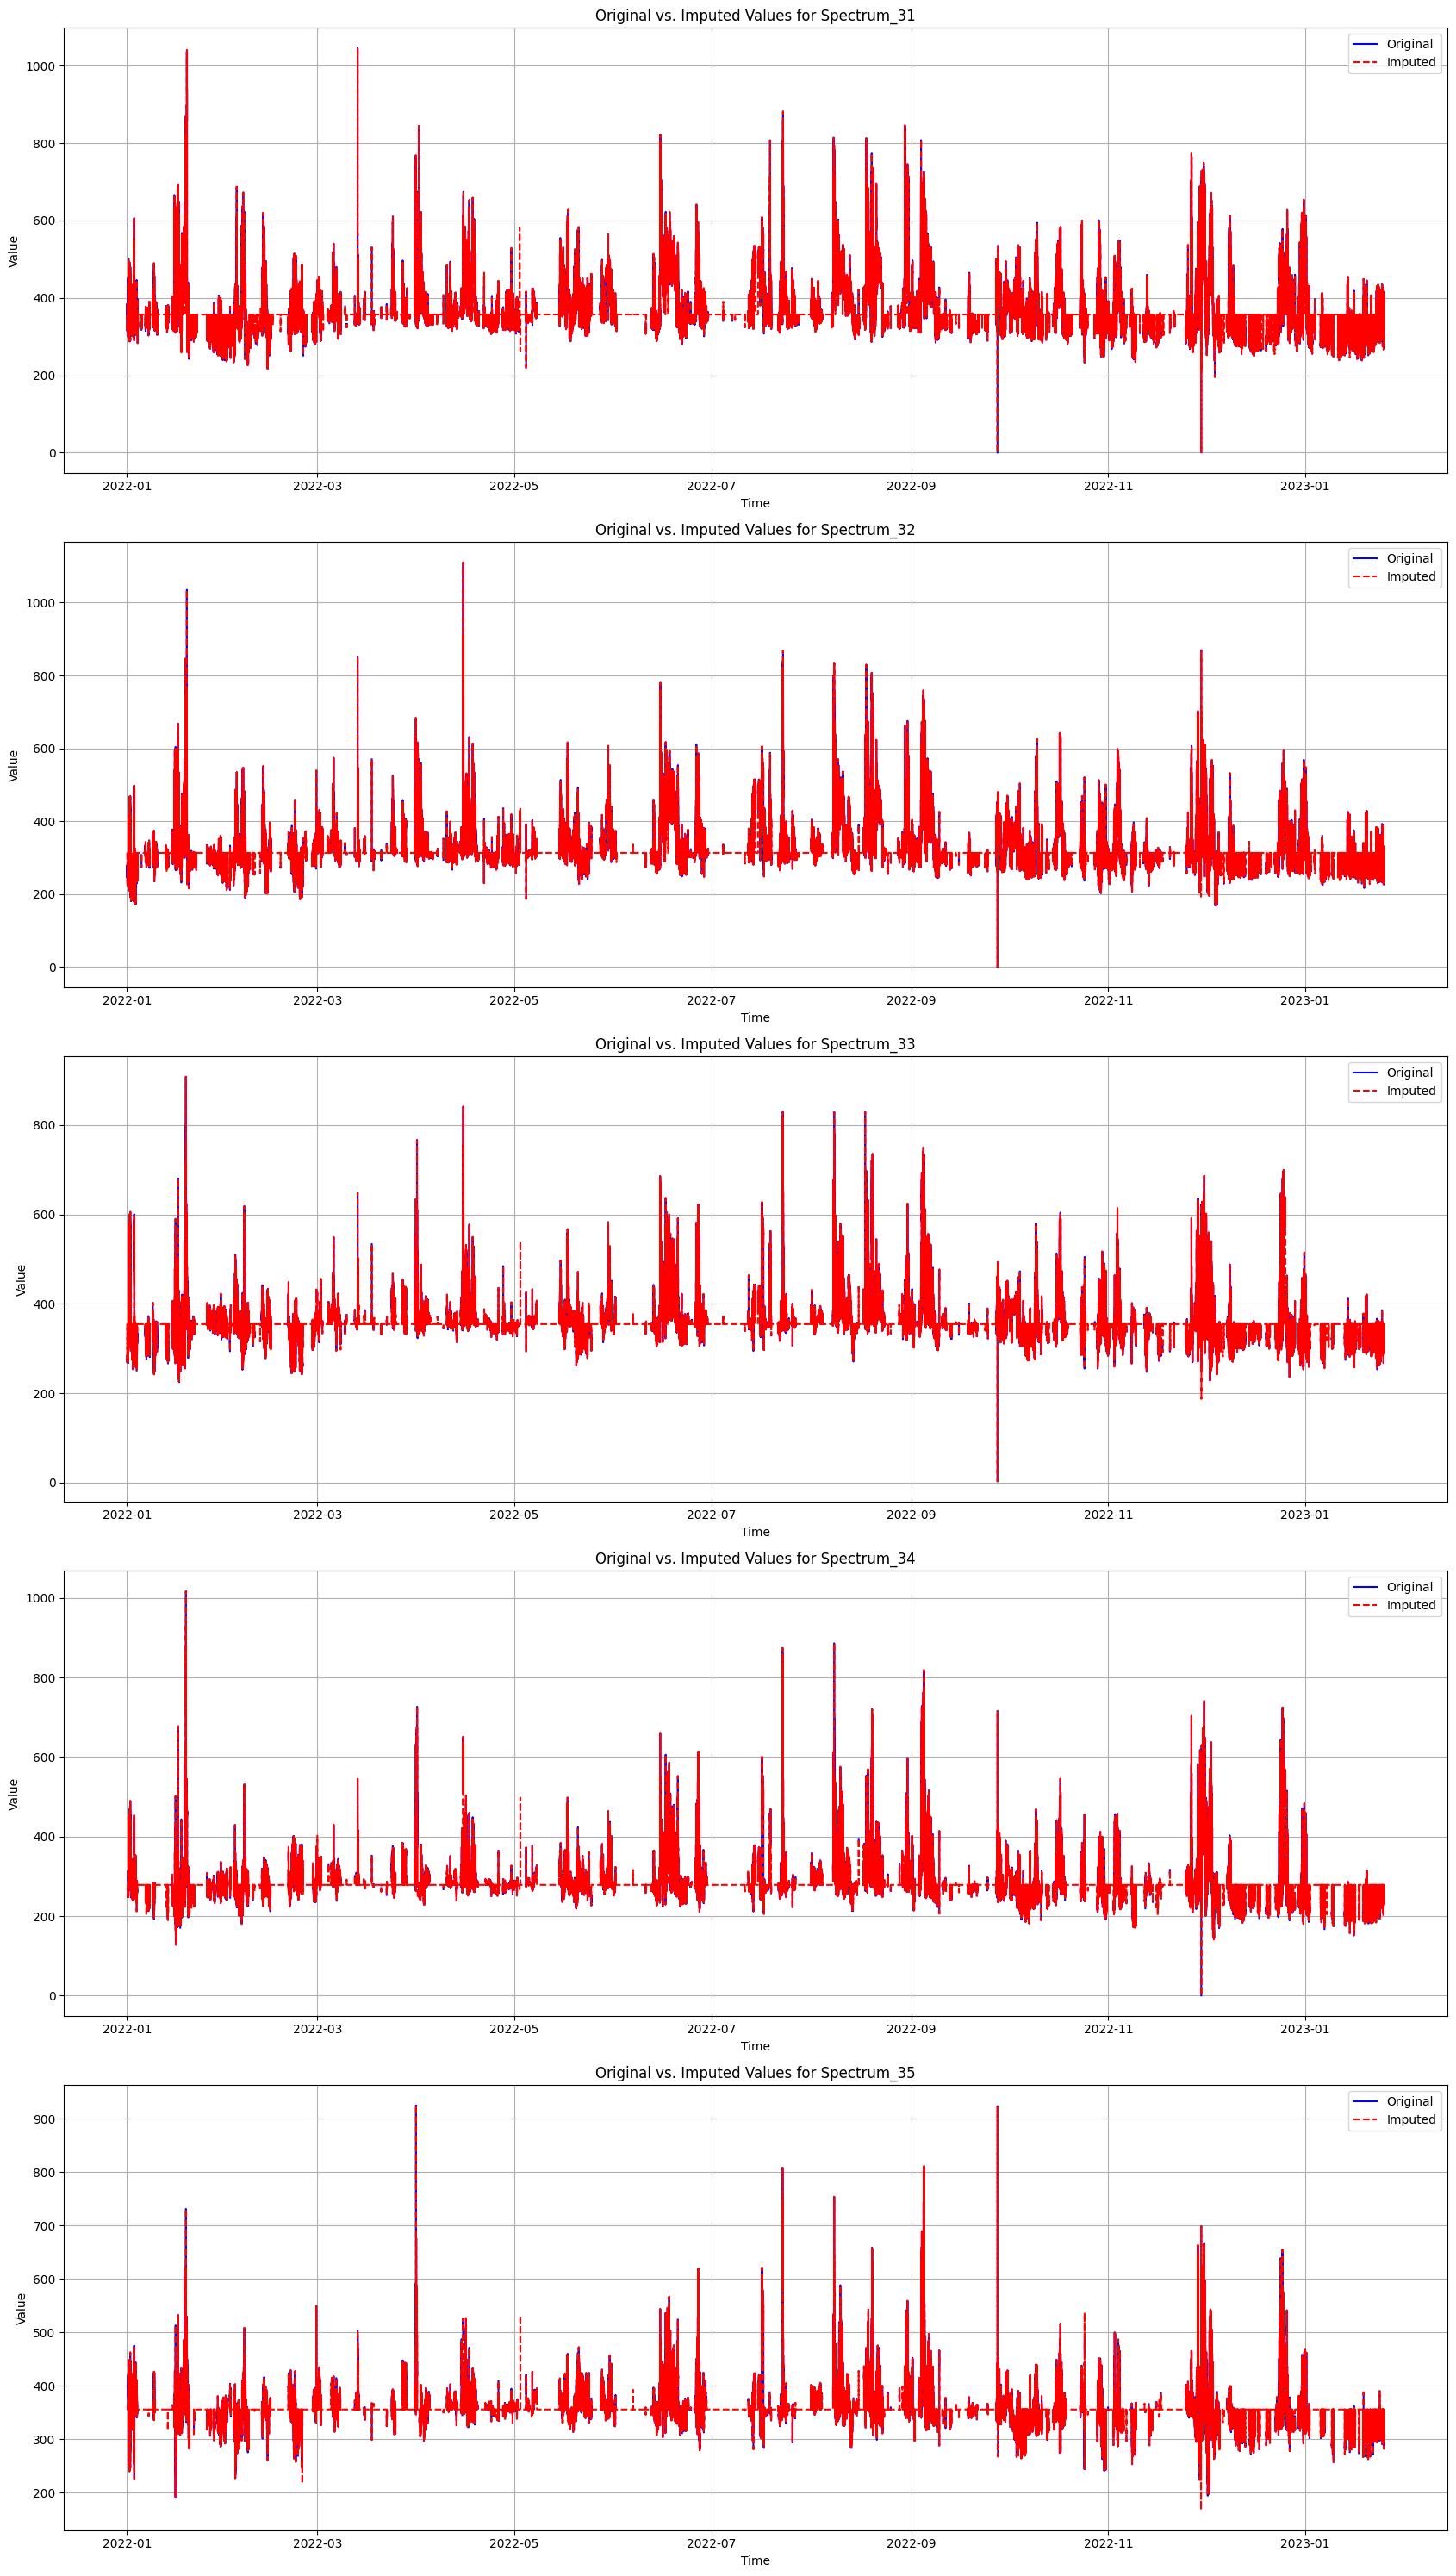

In [ ]:
last_columns = [col for col in train_df_imputed1.columns if col != 'Time'][-5:]

plt.figure(figsize=(17, 6 * len(last_columns)))

for idx, column in enumerate(last_columns):
    plt.subplot(len(last_columns), 1, idx + 1)

    plt.plot(train_df_imputed1['Time'], train_df_without_datetime[column], label='Original', color='blue')
    plt.plot(train_df_imputed1['Time'], train_df_imputed1[column], label='Imputed', color='red', linestyle='--')

    plt.title(f'Original vs. Imputed Values for {column}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

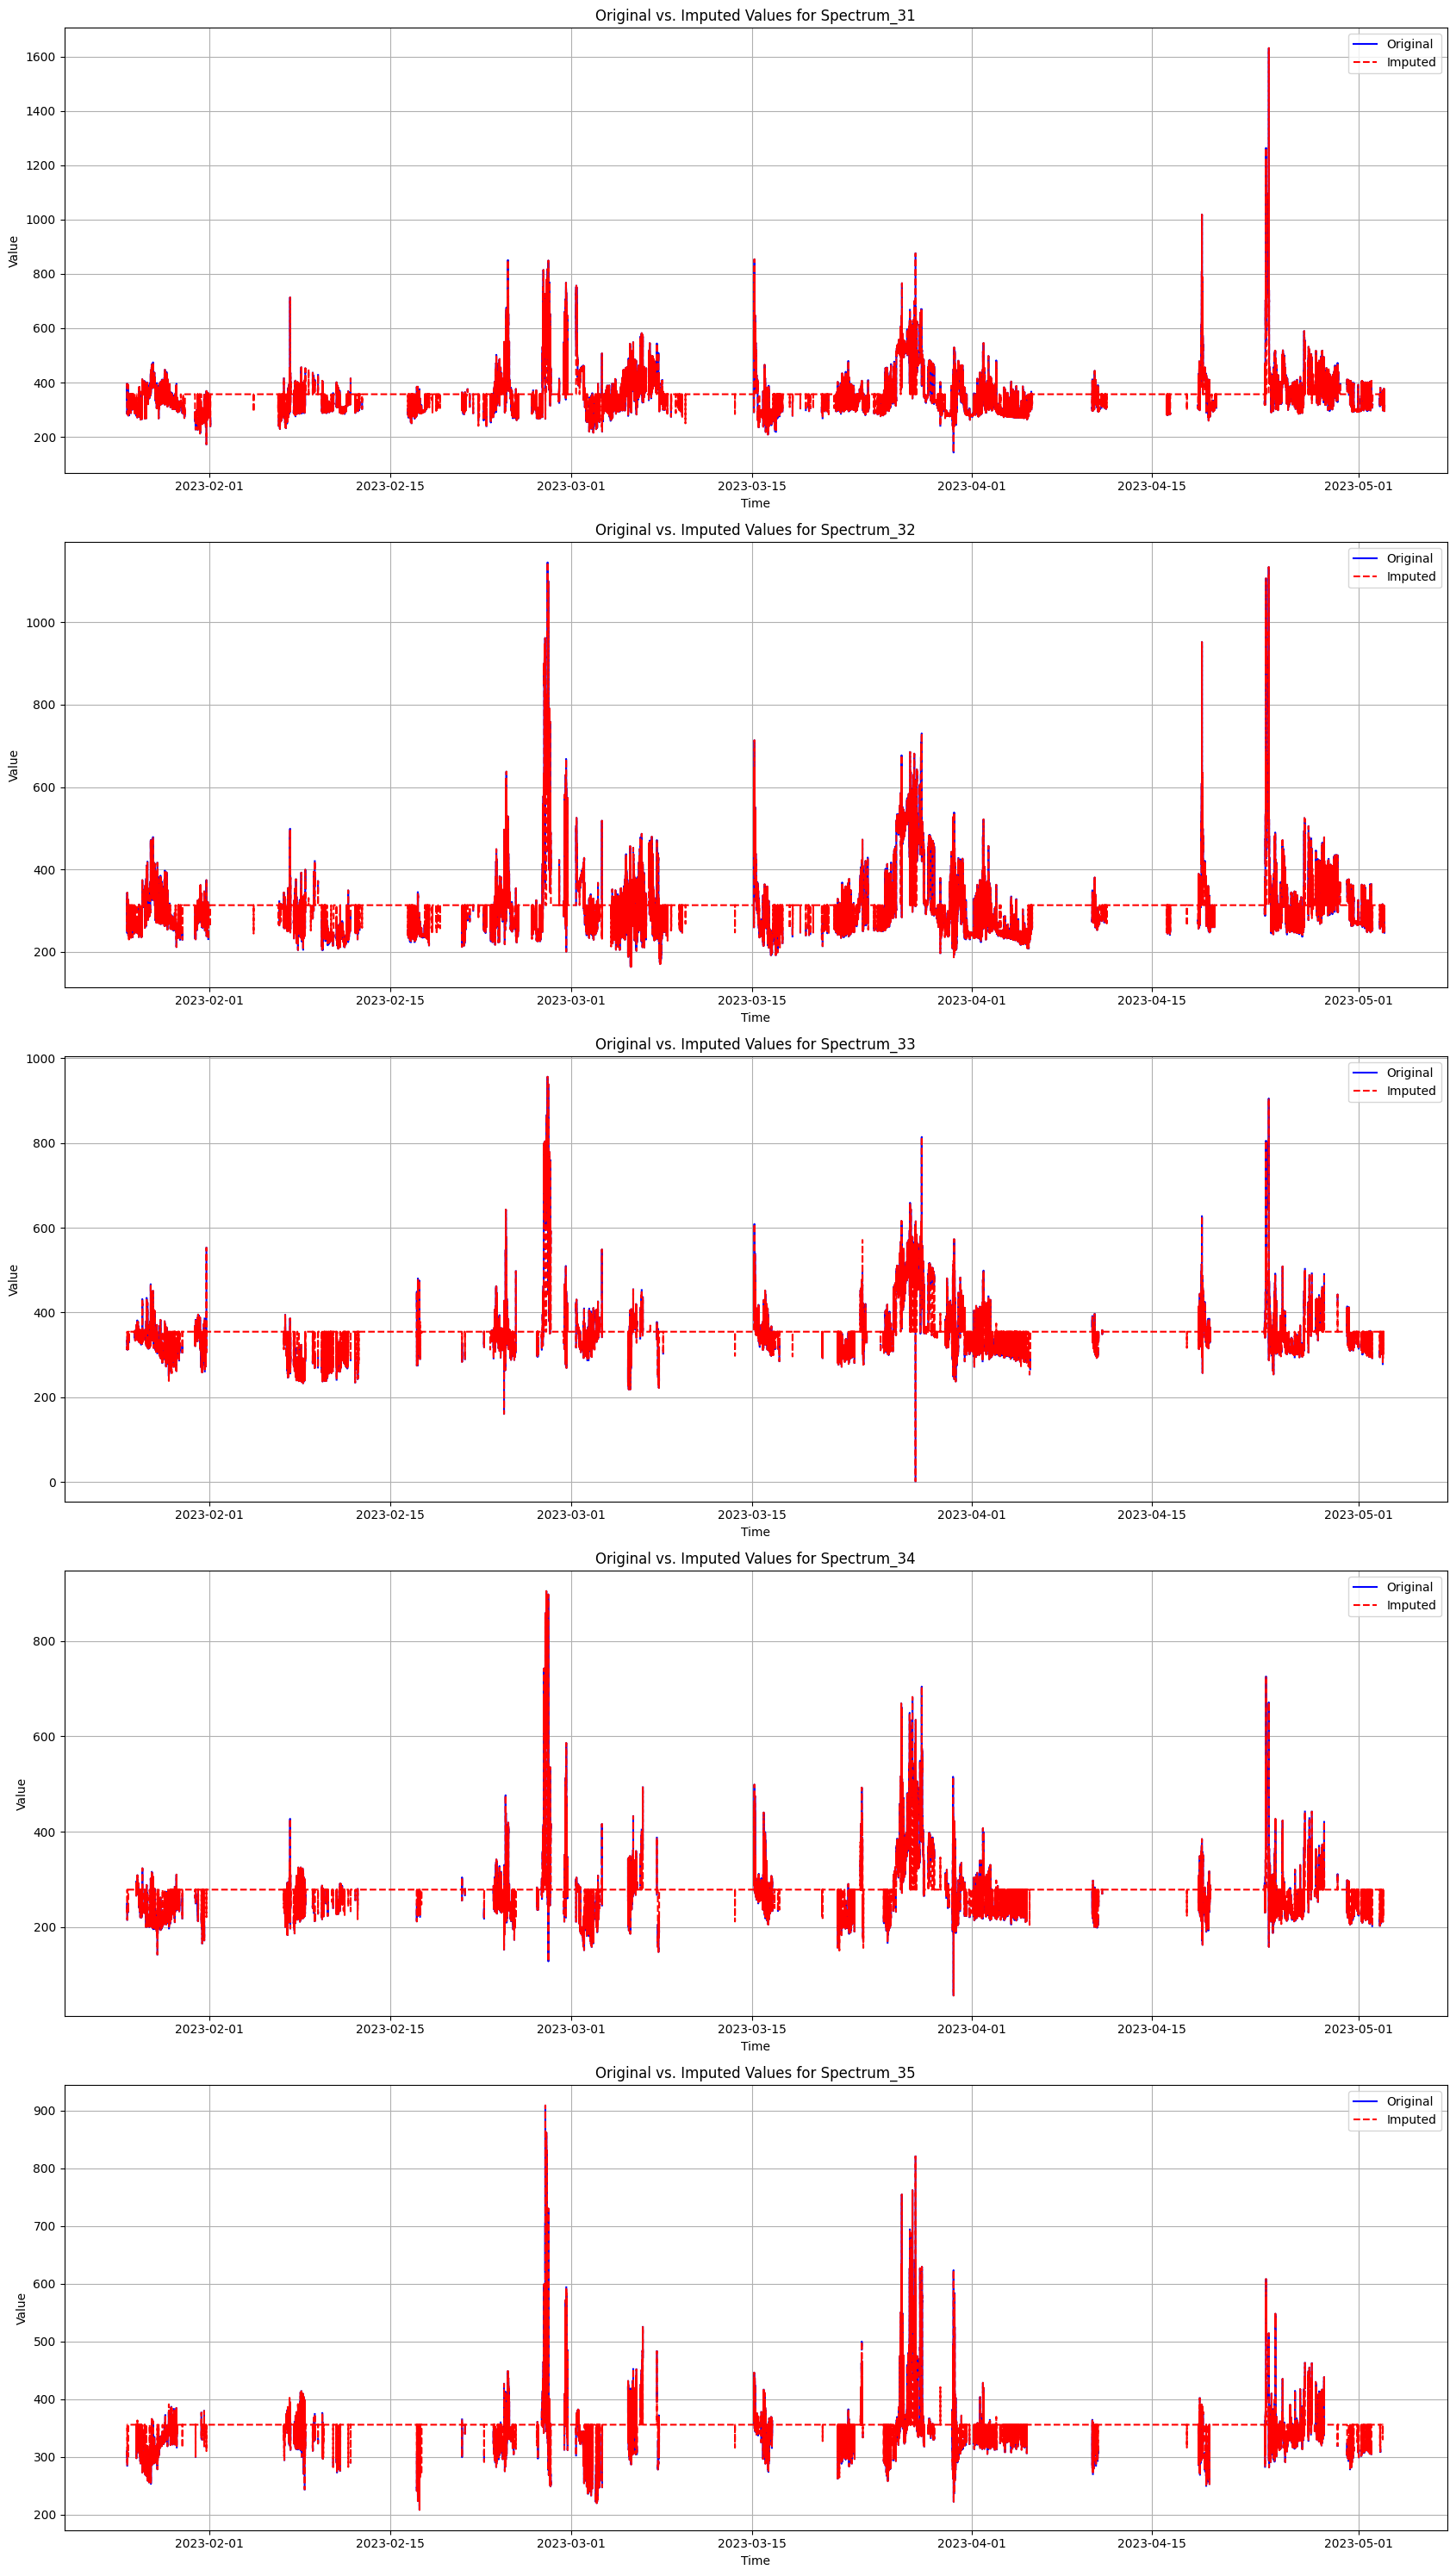

In [ ]:
last_columns = [col for col in test_df_imputed1.columns if col != 'Time'][-5:]

plt.figure(figsize=(17, 6 * len(last_columns)))

for idx, column in enumerate(last_columns):
    plt.subplot(len(last_columns), 1, idx + 1)

    plt.plot(test_df_imputed1['Time'], test_df_without_datetime[column], label='Original', color='blue')
    plt.plot(test_df_imputed1['Time'], test_df_imputed1[column], label='Imputed', color='red', linestyle='--')

    plt.title(f'Original vs. Imputed Values for {column}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
combined_df1 = pd.concat([train_df_imputed1, test_df_imputed1], axis=0).reset_index(drop=True)


In [ ]:
combined_df1.to_csv('/content/drive/MyDrive/NASA/combined_data1.csv', index=False)

In [ ]:
corrected_median= pd.read_csv('/content/drive/MyDrive/NASA/combined_data1.csv')

In [ ]:
corrected_median.head(100)

Time       Bx        By        Bz  Spectrum_1  Spectrum_2  \
0   2022-01-01 00:00:00 -6.17170  1.124830 -4.902280     38.0314    0.231726   
1   2022-01-01 00:01:00 -6.28883  1.233130 -4.790010     38.3868    0.231726   
2   2022-01-01 00:02:00 -6.11811  0.871923 -5.128300     37.5636    0.231726   
3   2022-01-01 00:03:00 -6.28704  1.249870 -4.766400     38.1094    0.242084   
4   2022-01-01 00:04:00 -6.42125  1.171560 -4.532300     37.5893    0.231726   
..                  ...      ...       ...       ...         ...         ...   
95  2022-01-01 01:35:00 -4.84912  6.913800  0.618553     35.6936    0.231726   
96  2022-01-01 01:36:00 -3.64632  5.030650  5.513540     37.5411    0.231726   
97  2022-01-01 01:37:00 -3.00274  5.500570  5.507850     36.3243    0.231726   
98  2022-01-01 01:38:00 -4.52453  6.345950  1.094910     32.4569    0.231726   
99  2022-01-01 01:39:00 -5.72279  4.407760 -4.106030     28.8730    0.231726   

    Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  Spectrum_26  \
0      46.0427     44.9743     55.9143     43.7069  ...      292.860   
1      45.5257     46.2587     55.1428     43.2768  ...      294.536   
2      45.1955     46.8222     55.7484     42.7894  ...      293.292   
3      46.7083     47.1713     53.5380     42.1558  ...      289.523   
4      47.4888     45.3234     54.5404     44.2773  ...      291.441   
..         ...         ...         ...         ...  ...          ...   
95     52.1977     51.9282     55.5345     41.1011  ...      296.401   
96     47.0967     44.0884     51.6316     44.9398  ...      285.741   
97     46.6237     43.4160     50.1398     41.7596  ...      287.370   
98     48.2909     45.4446     48.1940     37.9089  ...      296.822   
99     50.9275     47.1048     46.6652     30.8985  ...      339.701   

    Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
0       438.220      418.550      369.949      382.128      357.015   
1       438.220      418.550      369.949      382.128      357.015   
2       372.415      418.550      369.949      382.128      357.015   
3       372.449      418.550      369.949      382.128      357.015   
4       438.220      418.550      369.949      382.128      357.015   
..          ...          ...          ...          ...          ...   
95      358.279      320.576      294.671      382.128      357.015   
96      354.344      332.296      290.520      382.128      357.015   
97      353.417      329.635      294.151      382.128      357.015   
98      355.496      329.526      293.587      382.128      357.015   
99      373.924      319.543      289.404      319.015      322.584   

    Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
0       313.155       354.77      278.539     355.7555  
1       313.155       354.77      278.539     355.7555  
2       313.155       354.77      278.539     355.7555  
3       313.155       354.77      278.539     355.7555  
4       313.155       354.77      278.539     355.7555  
..          ...          ...          ...          ...  
95      313.155       354.77      278.539     355.7555  
96      313.155       354.77      278.539     355.7555  
97      313.155       354.77      278.539     355.7555  
98      313.155       354.77      278.539     355.7555  
99      269.236       354.77      278.539     355.7555  

[100 rows x 39 columns]

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer_mode = SimpleImputer(strategy='most_frequent')

train_imputed_mode = imputer_mode.fit_transform(train_df_without_datetime)
test_imputed_mode = imputer_mode.transform(test_df_without_datetime)

train_df_imputed_mode = pd.DataFrame(train_imputed_mode, columns=train_df_without_datetime.columns)
test_df_imputed_mode = pd.DataFrame(test_imputed_mode, columns=test_df_without_datetime.columns)

train_df_imputed_mode = pd.concat([datetime_train.reset_index(drop=True), train_df_imputed_mode], axis=1)
test_df_imputed_mode = pd.concat([datetime_test.reset_index(drop=True), test_df_imputed_mode], axis=1)


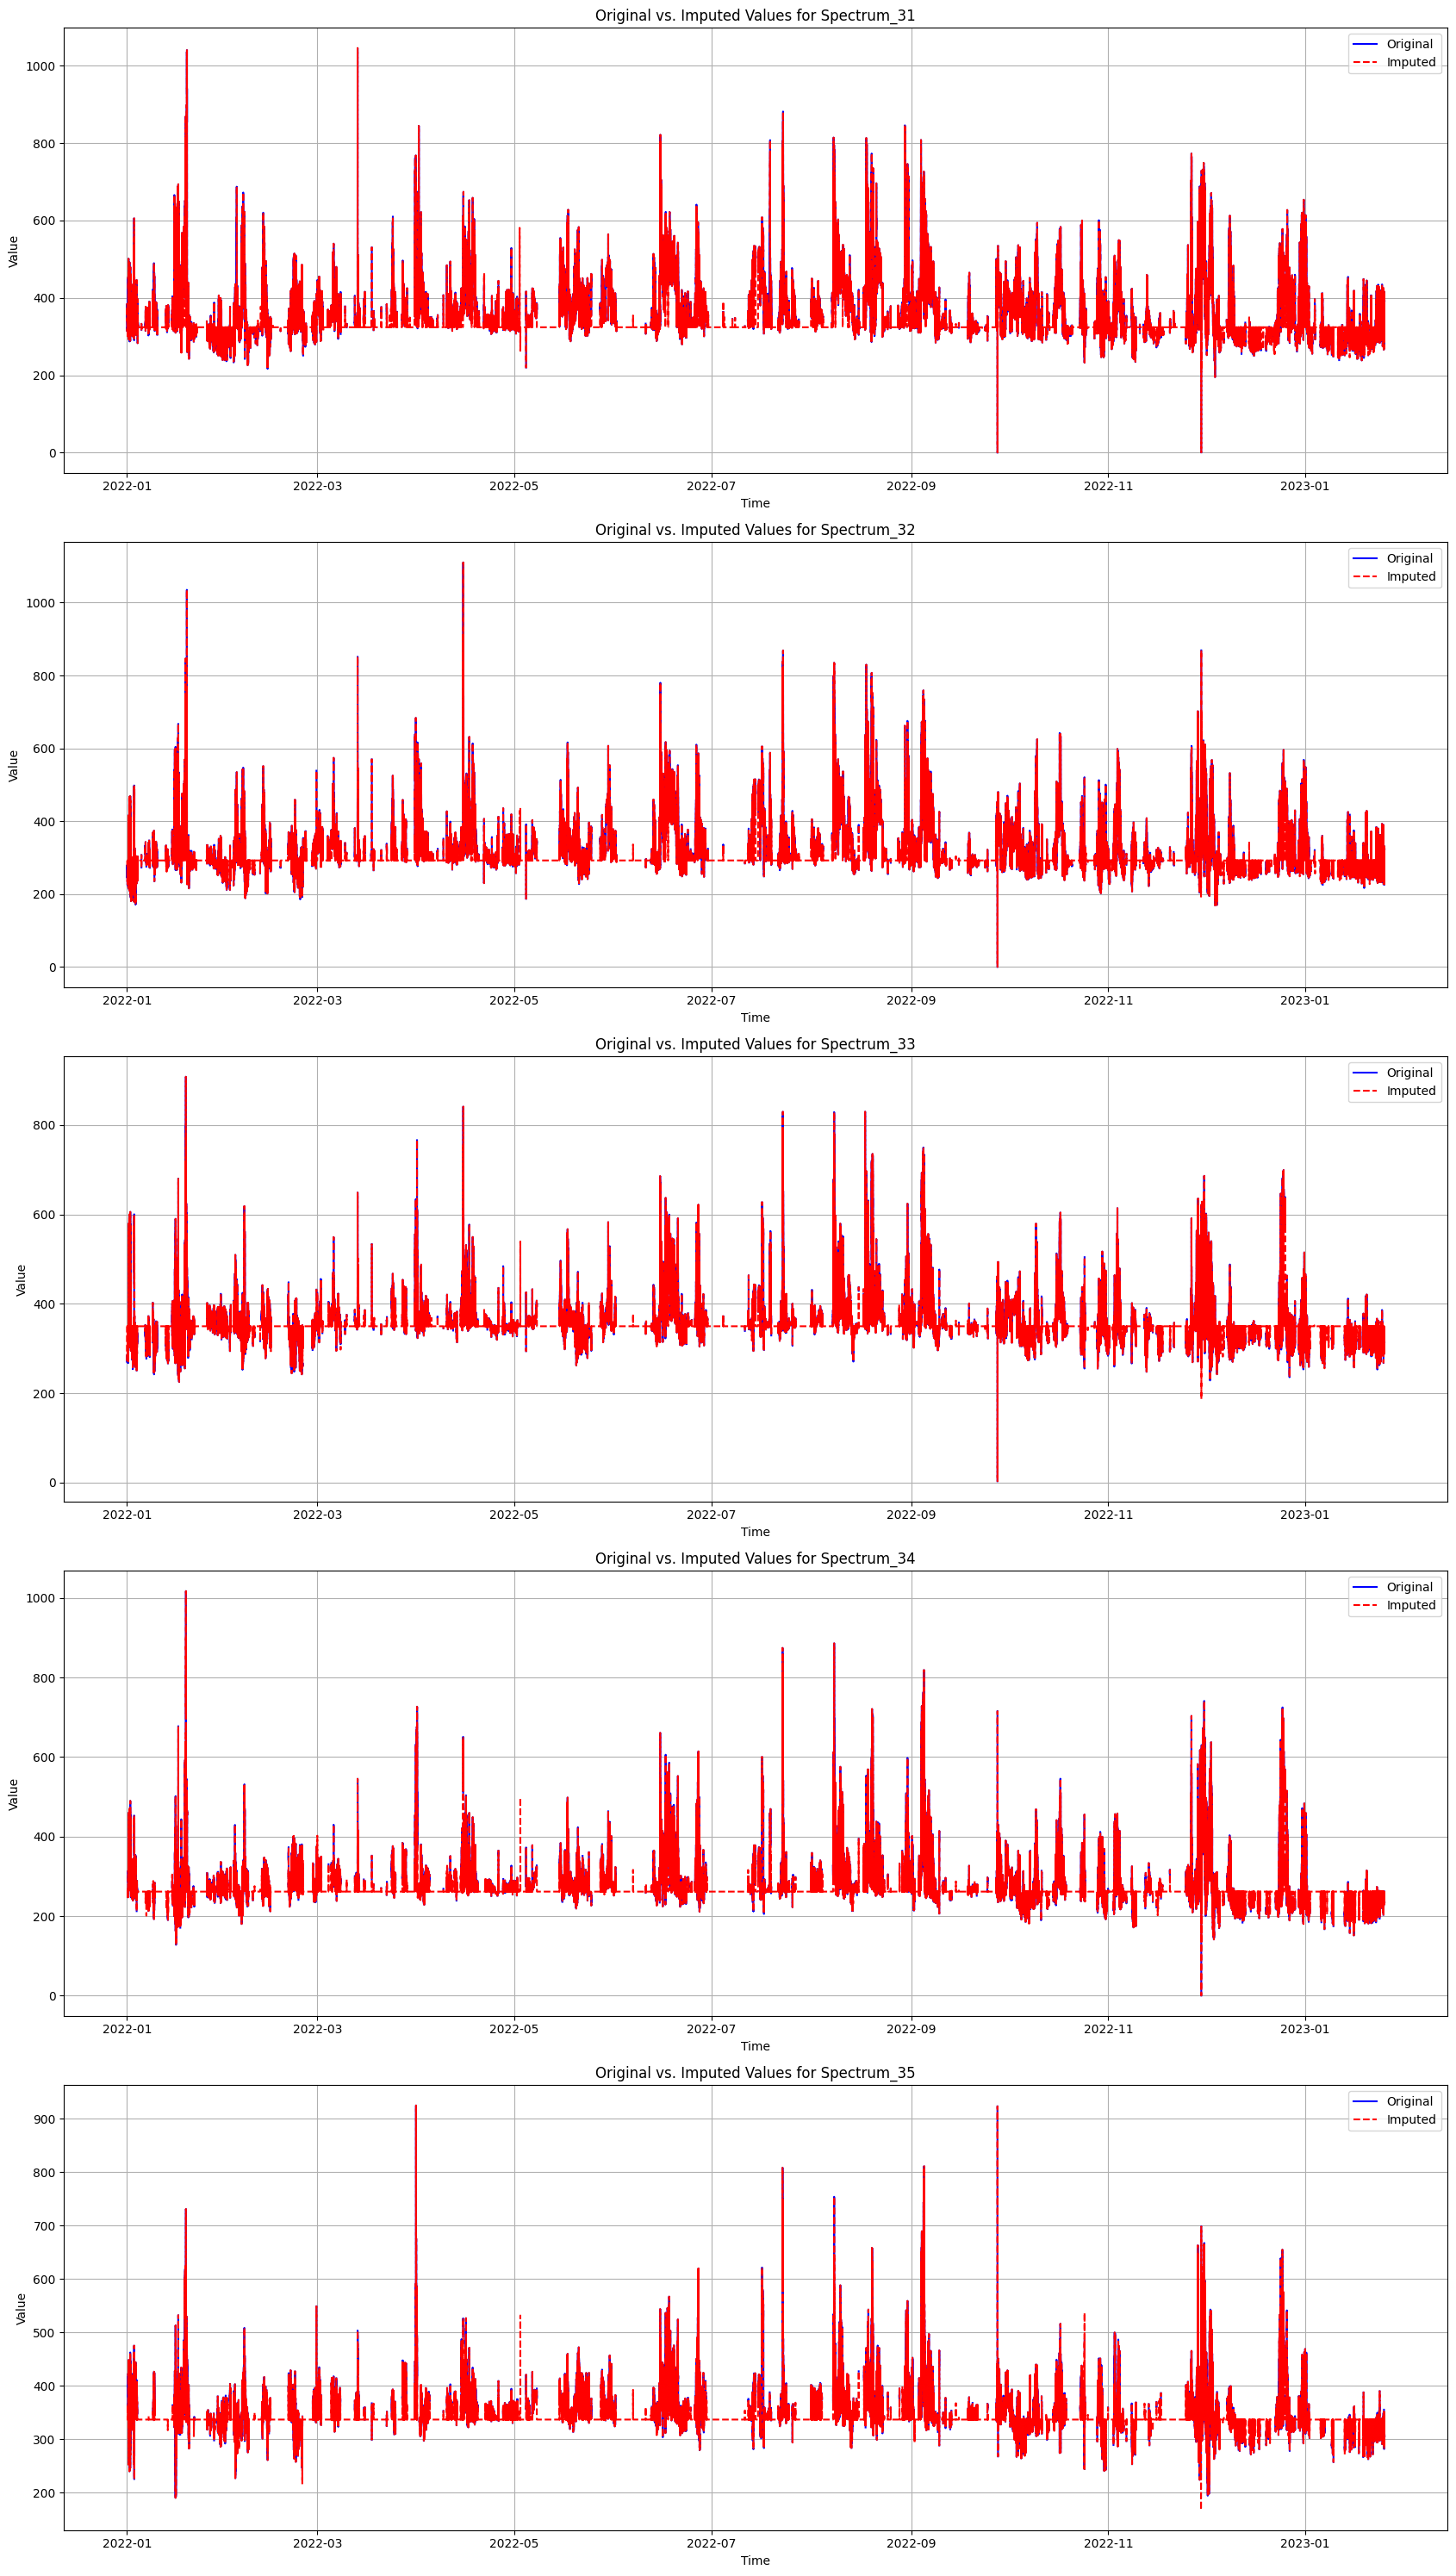

In [ ]:
last_columns = [col for col in train_df_imputed_mode.columns if col != 'Time'][-5:]

plt.figure(figsize=(17, 6 * len(last_columns)))

for idx, column in enumerate(last_columns):
    plt.subplot(len(last_columns), 1, idx + 1)

    plt.plot(train_df_imputed_mode['Time'], train_df_without_datetime[column], label='Original', color='blue')
    plt.plot(train_df_imputed_mode['Time'], train_df_imputed_mode[column], label='Imputed', color='red', linestyle='--')

    plt.title(f'Original vs. Imputed Values for {column}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

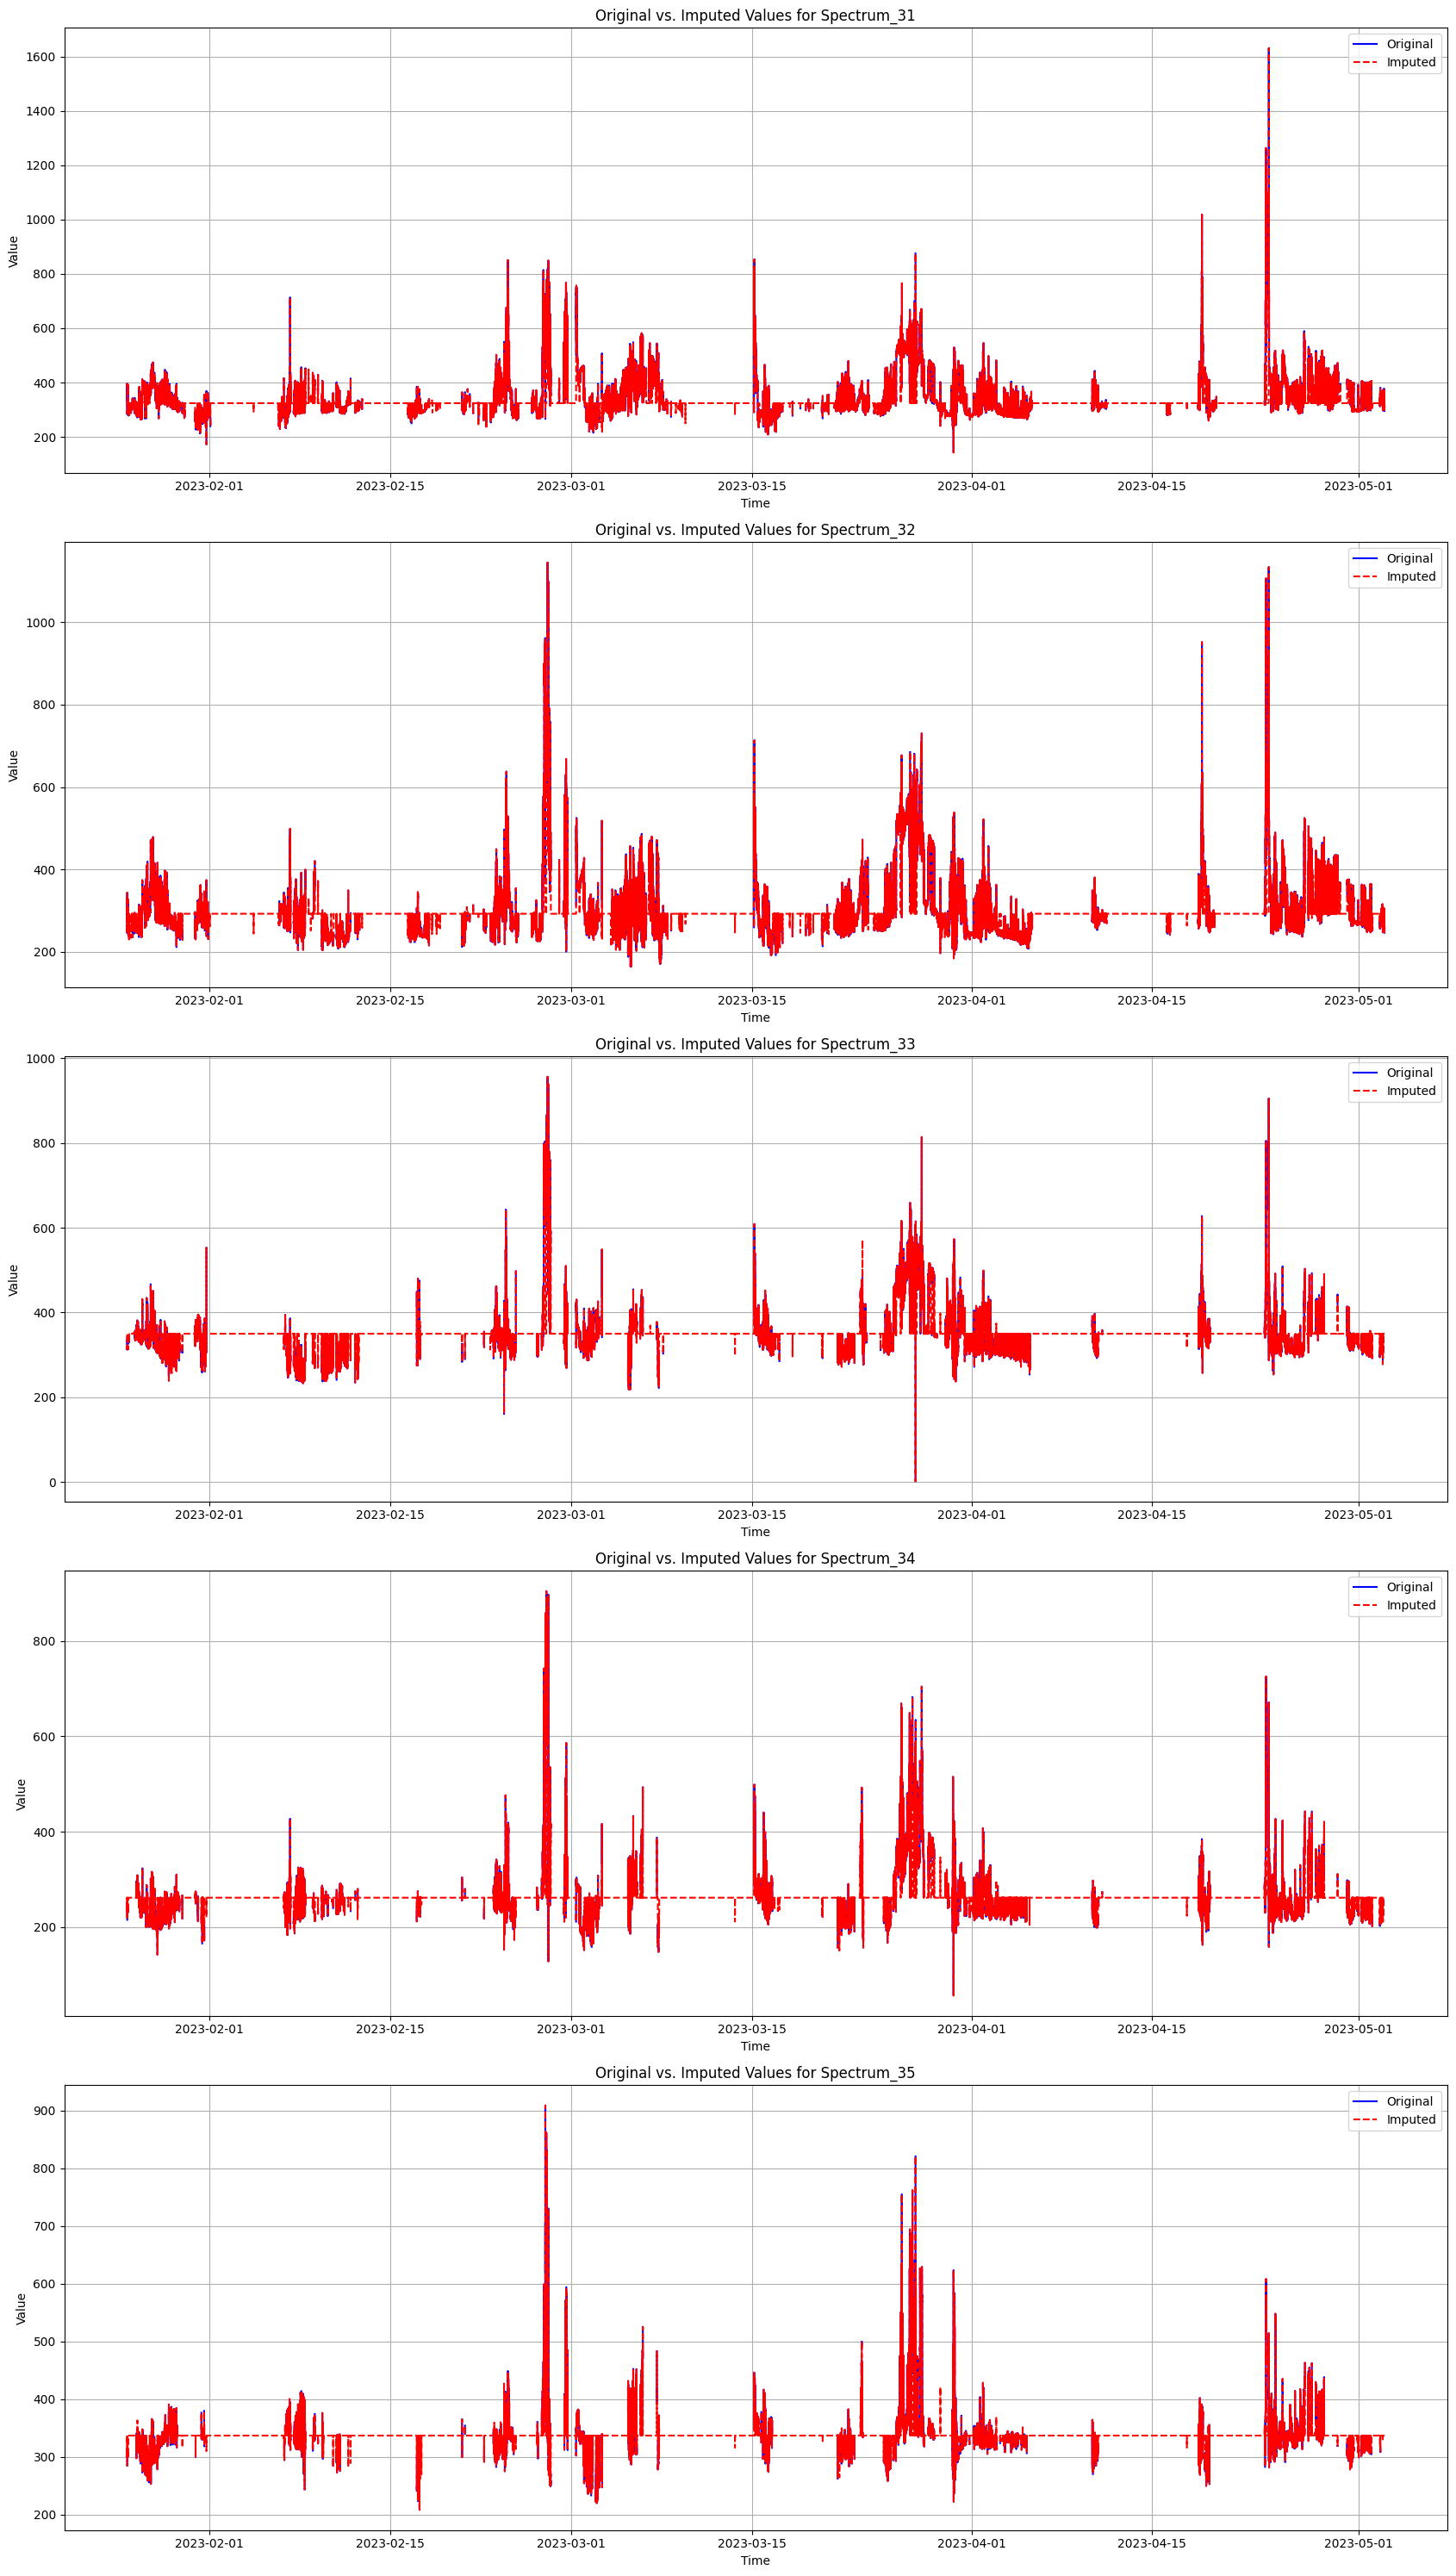

In [ ]:
last_columns = [col for col in test_df_imputed_mode.columns if col != 'Time'][-5:]

plt.figure(figsize=(17, 6 * len(last_columns)))

for idx, column in enumerate(last_columns):
    plt.subplot(len(last_columns), 1, idx + 1)

    plt.plot(test_df_imputed_mode['Time'], test_df_without_datetime[column], label='Original', color='blue')
    plt.plot(test_df_imputed_mode['Time'], test_df_imputed_mode[column], label='Imputed', color='red', linestyle='--')

    plt.title(f'Original vs. Imputed Values for {column}')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
combined_df2 = pd.concat([train_df_imputed_mode, test_df_imputed_mode], axis=0).reset_index(drop=True)


In [ ]:
combined_df2.to_csv('/content/drive/MyDrive/NASA/combined_data2.csv', index=False)

In [ ]:
corrected_mode= pd.read_csv('/content/drive/MyDrive/NASA/combined_data2.csv')

In [ ]:
corrected_mode.head(100)

Time       Bx        By        Bz  Spectrum_1  Spectrum_2  \
0   2022-01-01 00:00:00 -6.17170  1.124830 -4.902280     38.0314    0.231726   
1   2022-01-01 00:01:00 -6.28883  1.233130 -4.790010     38.3868    0.231726   
2   2022-01-01 00:02:00 -6.11811  0.871923 -5.128300     37.5636    0.231726   
3   2022-01-01 00:03:00 -6.28704  1.249870 -4.766400     38.1094    0.242084   
4   2022-01-01 00:04:00 -6.42125  1.171560 -4.532300     37.5893    0.231726   
..                  ...      ...       ...       ...         ...         ...   
95  2022-01-01 01:35:00 -4.84912  6.913800  0.618553     35.6936    0.231726   
96  2022-01-01 01:36:00 -3.64632  5.030650  5.513540     37.5411    0.231726   
97  2022-01-01 01:37:00 -3.00274  5.500570  5.507850     36.3243    0.231726   
98  2022-01-01 01:38:00 -4.52453  6.345950  1.094910     32.4569    0.231726   
99  2022-01-01 01:39:00 -5.72279  4.407760 -4.106030     28.8730    0.231726   

    Spectrum_3  Spectrum_4  Spectrum_5  Spectrum_6  ...  Spectrum_26  \
0      46.0427     44.9743     55.9143     43.7069  ...      292.860   
1      45.5257     46.2587     55.1428     43.2768  ...      294.536   
2      45.1955     46.8222     55.7484     42.7894  ...      293.292   
3      46.7083     47.1713     53.5380     42.1558  ...      289.523   
4      47.4888     45.3234     54.5404     44.2773  ...      291.441   
..         ...         ...         ...         ...  ...          ...   
95     52.1977     51.9282     55.5345     41.1011  ...      296.401   
96     47.0967     44.0884     51.6316     44.9398  ...      285.741   
97     46.6237     43.4160     50.1398     41.7596  ...      287.370   
98     48.2909     45.4446     48.1940     37.9089  ...      296.822   
99     50.9275     47.1048     46.6652     30.8985  ...      339.701   

    Spectrum_27  Spectrum_28  Spectrum_29  Spectrum_30  Spectrum_31  \
0       442.751      366.637      311.971      309.577      324.082   
1       442.751      366.637      311.971      309.577      324.082   
2       372.415      366.637      311.971      309.577      324.082   
3       372.449      366.637      311.971      309.577      324.082   
4       442.751      366.637      311.971      309.577      324.082   
..          ...          ...          ...          ...          ...   
95      358.279      320.576      294.671      309.577      324.082   
96      354.344      332.296      290.520      309.577      324.082   
97      353.417      329.635      294.151      309.577      324.082   
98      355.496      329.526      293.587      309.577      324.082   
99      373.924      319.543      289.404      319.015      322.584   

    Spectrum_32  Spectrum_33  Spectrum_34  Spectrum_35  
0       292.344      349.961       261.62      336.925  
1       292.344      349.961       261.62      336.925  
2       292.344      349.961       261.62      336.925  
3       292.344      349.961       261.62      336.925  
4       292.344      349.961       261.62      336.925  
..          ...          ...          ...          ...  
95      292.344      349.961       261.62      336.925  
96      292.344      349.961       261.62      336.925  
97      292.344      349.961       261.62      336.925  
98      292.344      349.961       261.62      336.925  
99      269.236      349.961       261.62      336.925  

[100 rows x 39 columns]